# 미세먼지와 건강

## 서울시 청소년 아토피·천식 통계
출처 : 보건복지부, 질병관리본부「청소년건강행태온라인조사」
* url: https://data.seoul.go.kr/dataList/10959/S/2/datasetView.do#

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from glob import glob

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
file_name = glob("data/finedust_disease.csv")
file_name

df = pd.read_csv(file_name[0])
df = df.set_index('학생별(1)').T.reset_index()
df.head(4)

학생별(1),index,학생별(1),전체,남학생,여학생
0,2015,천식 의사진단율,9.3,11.3,7.1
1,2015.1,알레르기비염 의사진단율,34.7,34.6,34.9
2,2015.2,아토피피부염 의사진단율,24.9,20.6,29.5
3,2016,천식 의사진단율,9.4,10.7,8


In [3]:
cols = df.columns
cols

Index(['index', '학생별(1)', '전체', '남학생', '여학생'], dtype='object', name='학생별(1)')

In [4]:
cols = ["연도", "질병명", "전체", "남학생", "여학생"] 
df.columns = cols
df.head(5)

,연도,질병명,전체,남학생,여학생
0,2015,천식 의사진단율,9.3,11.3,7.1
1,2015.1,알레르기비염 의사진단율,34.7,34.6,34.9
2,2015.2,아토피피부염 의사진단율,24.9,20.6,29.5
3,2016,천식 의사진단율,9.4,10.7,8
4,2016.1,알레르기비염 의사진단율,37.2,35.9,38.7


In [5]:
df["연도"] = df["연도"].str[:4]
df["연도"] = df["연도"].astype('int')
df.dtypes

연도      int64
질병명    object
전체     object
남학생    object
여학생    object
dtype: object

In [6]:
df["전체"] = df["전체"].astype('float')

In [7]:
df["질병명"] = df["질병명"].str.replace(" 의사진단율", "")
df.head(3)

,연도,질병명,전체,남학생,여학생
0,2015,천식,9.3,11.3,7.1
1,2015,알레르기비염,34.7,34.6,34.9
2,2015,아토피피부염,24.9,20.6,29.5


In [8]:
df.describe()

,연도,전체
count,21.00000,21.000000
mean,2018.00000,23.238095
std,2.04939,12.097664
min,2015.00000,6.100000
25%,2016.00000,9.400000
50%,2018.00000,24.900000
75%,2020.00000,36.500000
max,2021.00000,38.000000


In [9]:
# df = df.groupby(["질병명" == "천식"])["전체"].mean()
# df.reset_index(inplace = True)
# df

In [10]:
df.nunique()

연도      7
질병명     3
전체     17
남학생    19
여학생    20
dtype: int64

<AxesSubplot:xlabel='연도'>

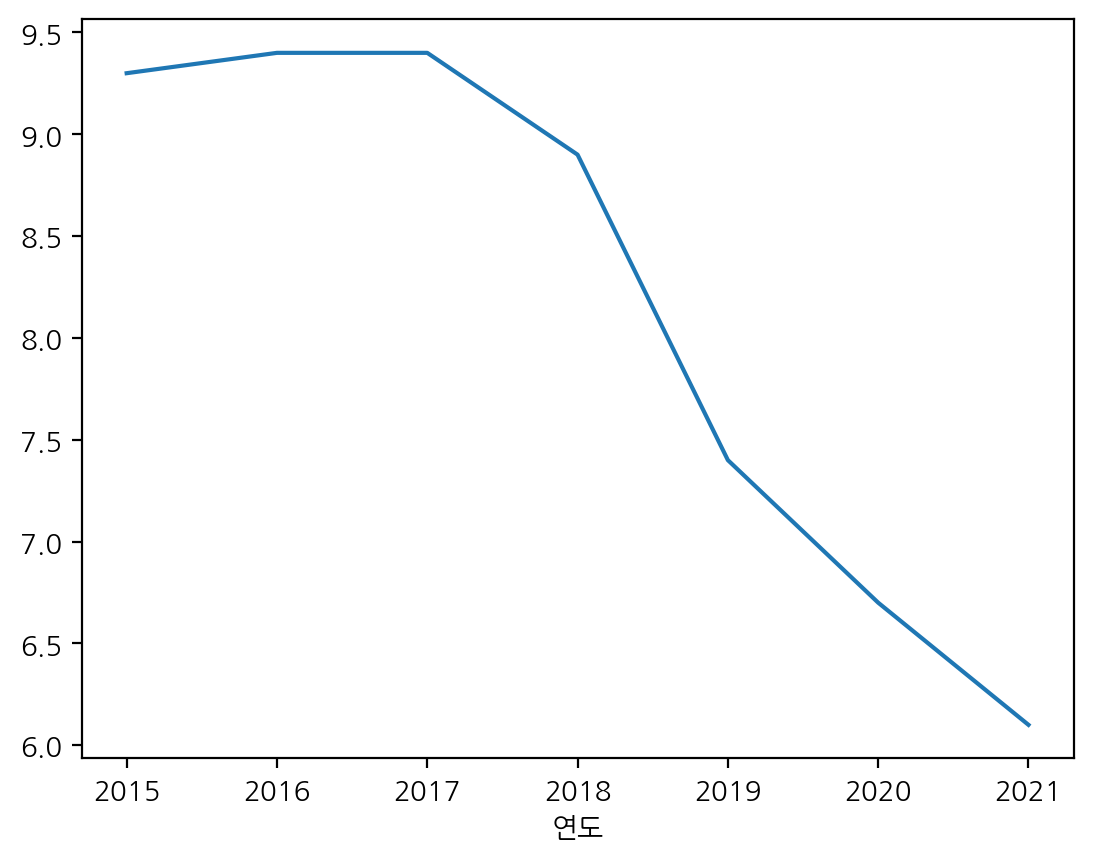

In [11]:
df[df["질병명"] == "천식"].groupby(by=["연도"])["전체"].sum().plot(kind="line")

<Figure size 1000x300 with 0 Axes>

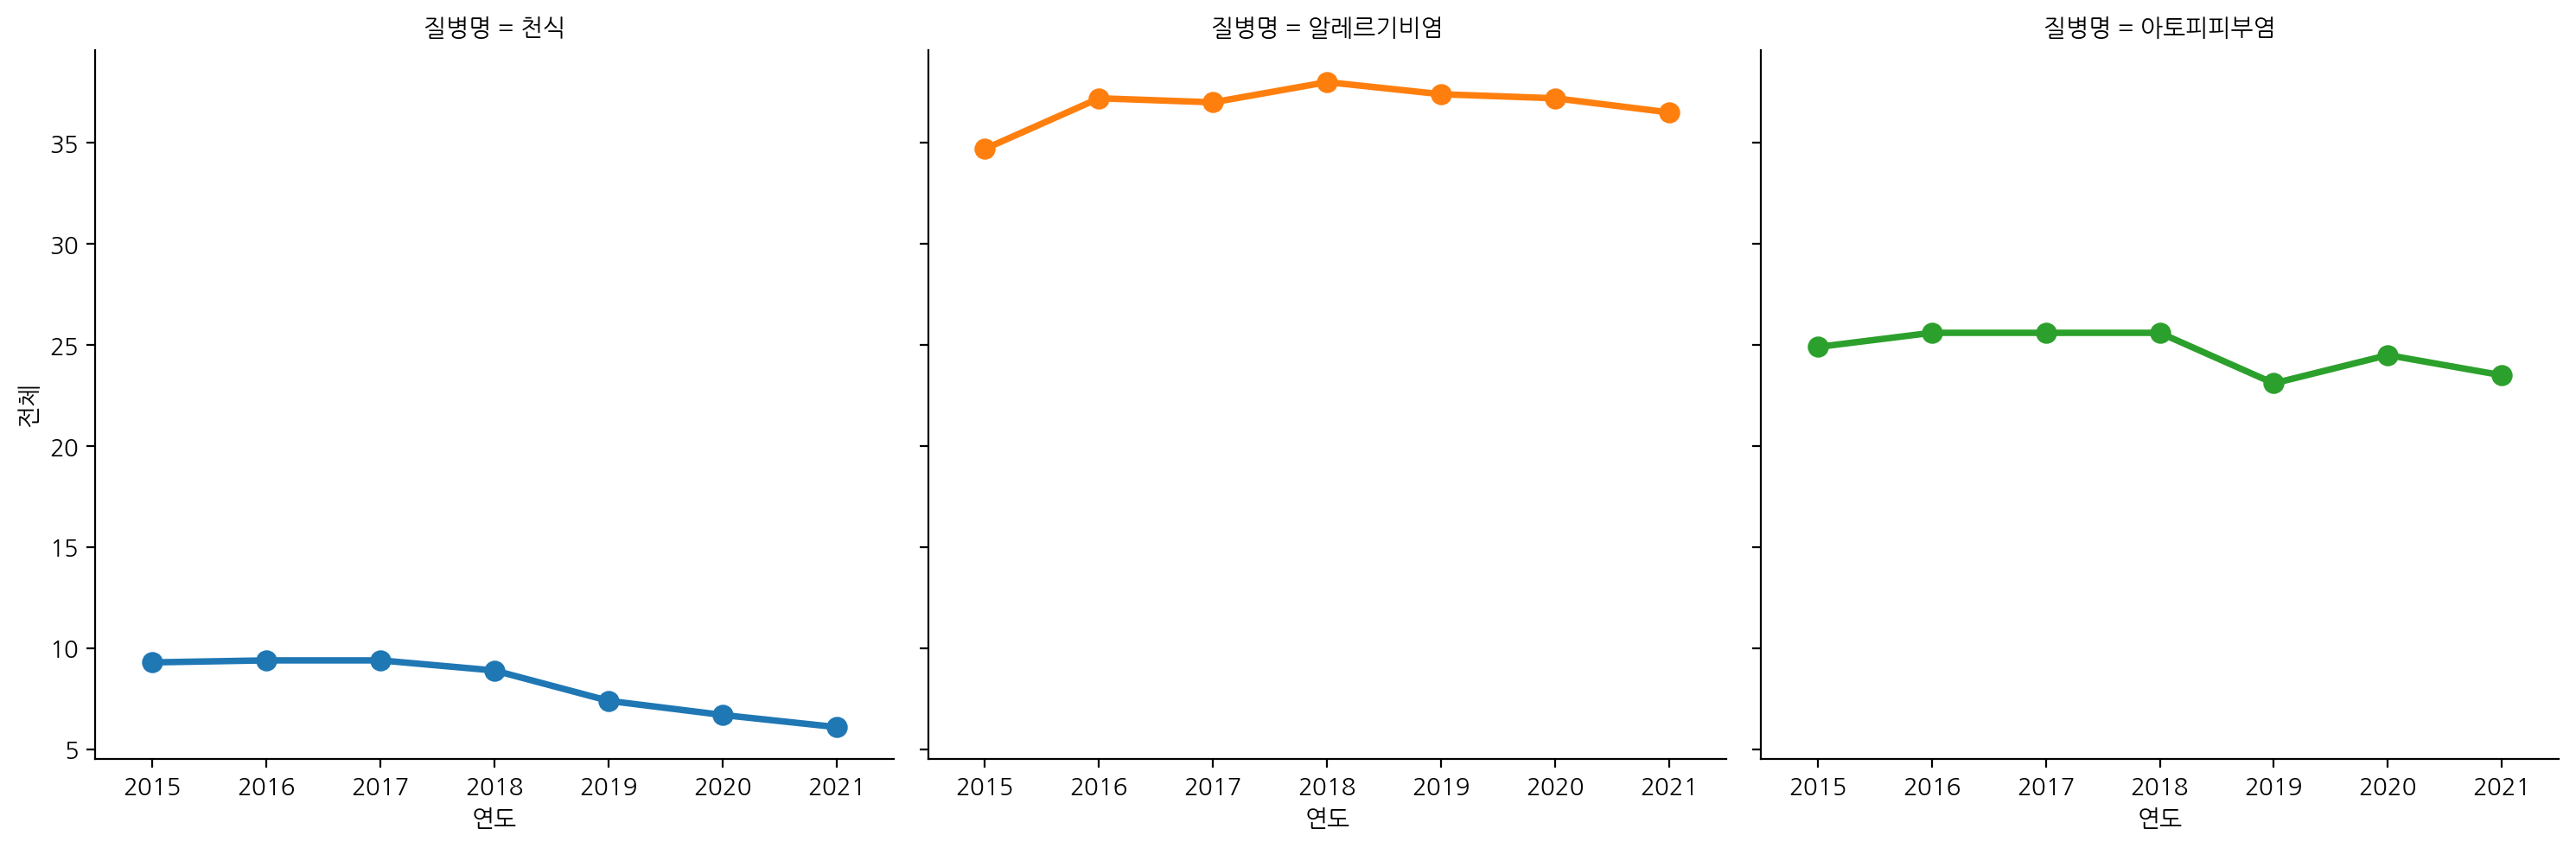

In [12]:
plt.figure(figsize=(10,3))
sns.catplot(data=df, x="연도", y="전체", col="질병명", col_wrap=3, kind="point", hue="질병명", errorbar=None)

<Figure size 1000x300 with 0 Axes>

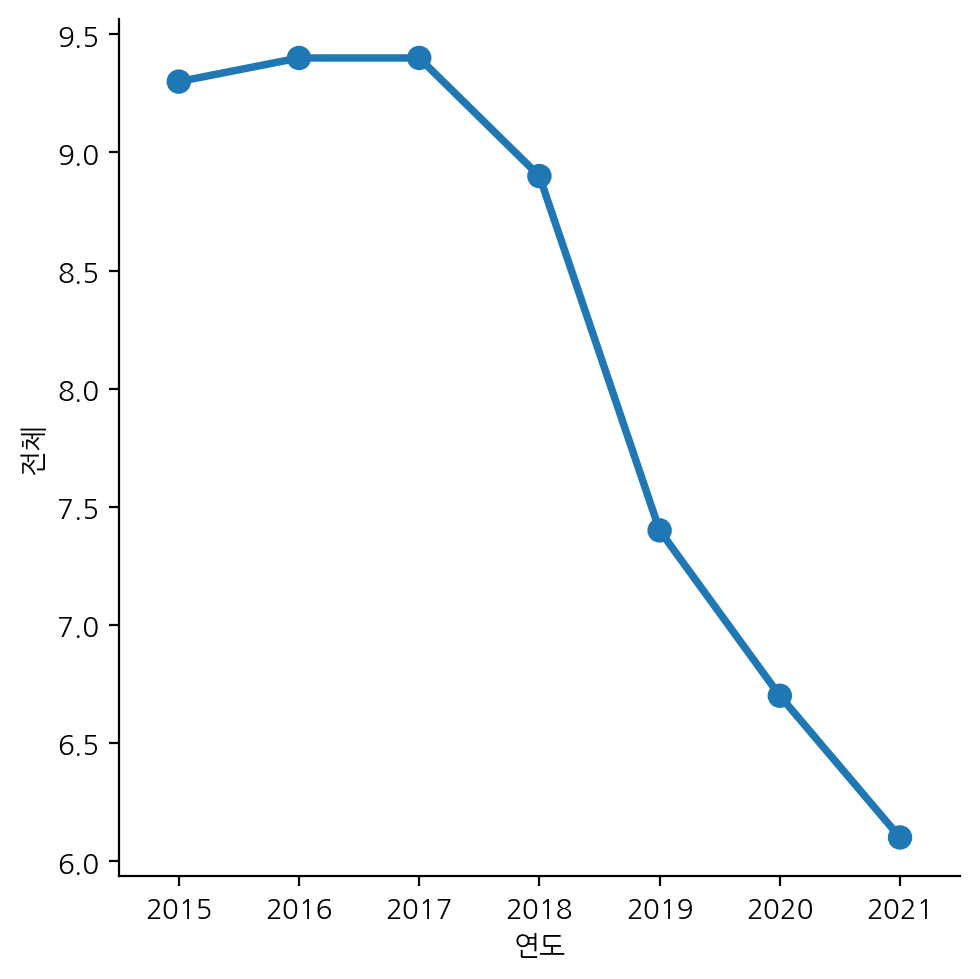

In [13]:
plt.figure(figsize=(10,3))
sns.catplot(data=df[df["질병명"] == "천식"], x="연도", y="전체", kind="point", errorbar=None)

<Figure size 1000x300 with 0 Axes>

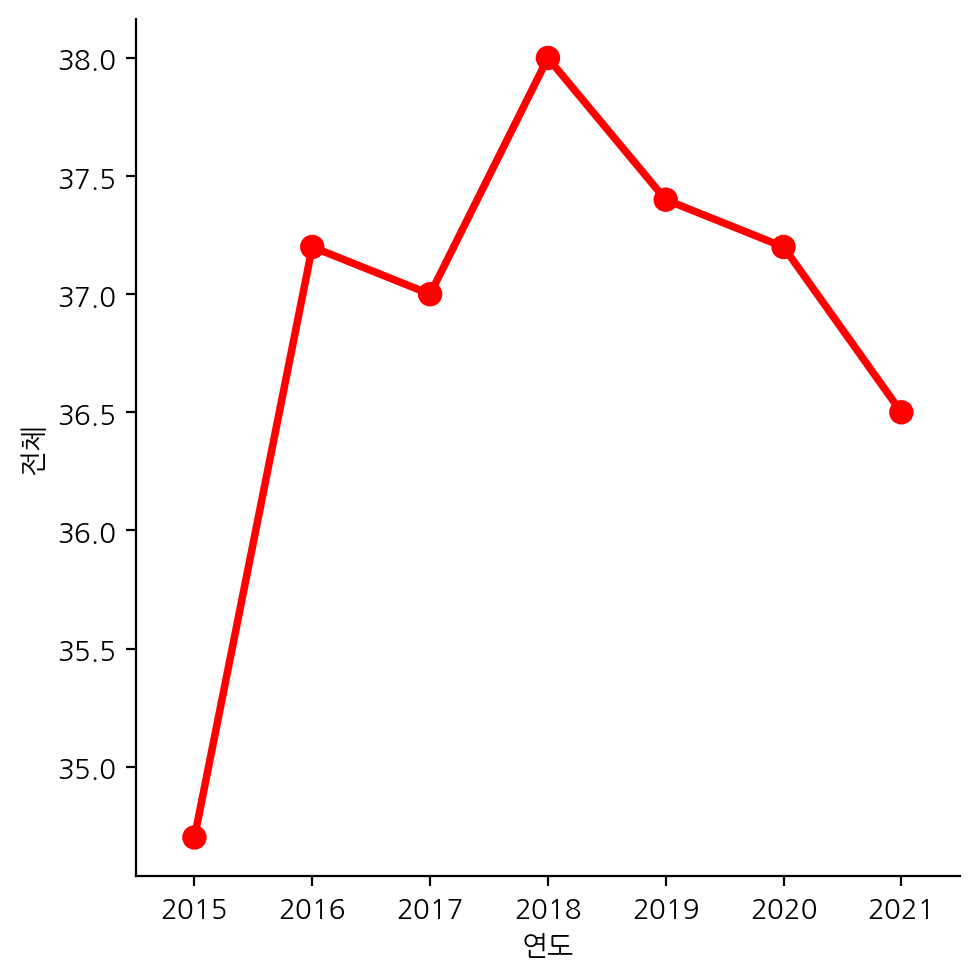

In [14]:
plt.figure(figsize=(10,3))
sns.catplot(data=df[df["질병명"] == "알레르기비염"], x="연도", y="전체", kind="point", errorbar=None, color="red")

<Figure size 1000x300 with 0 Axes>

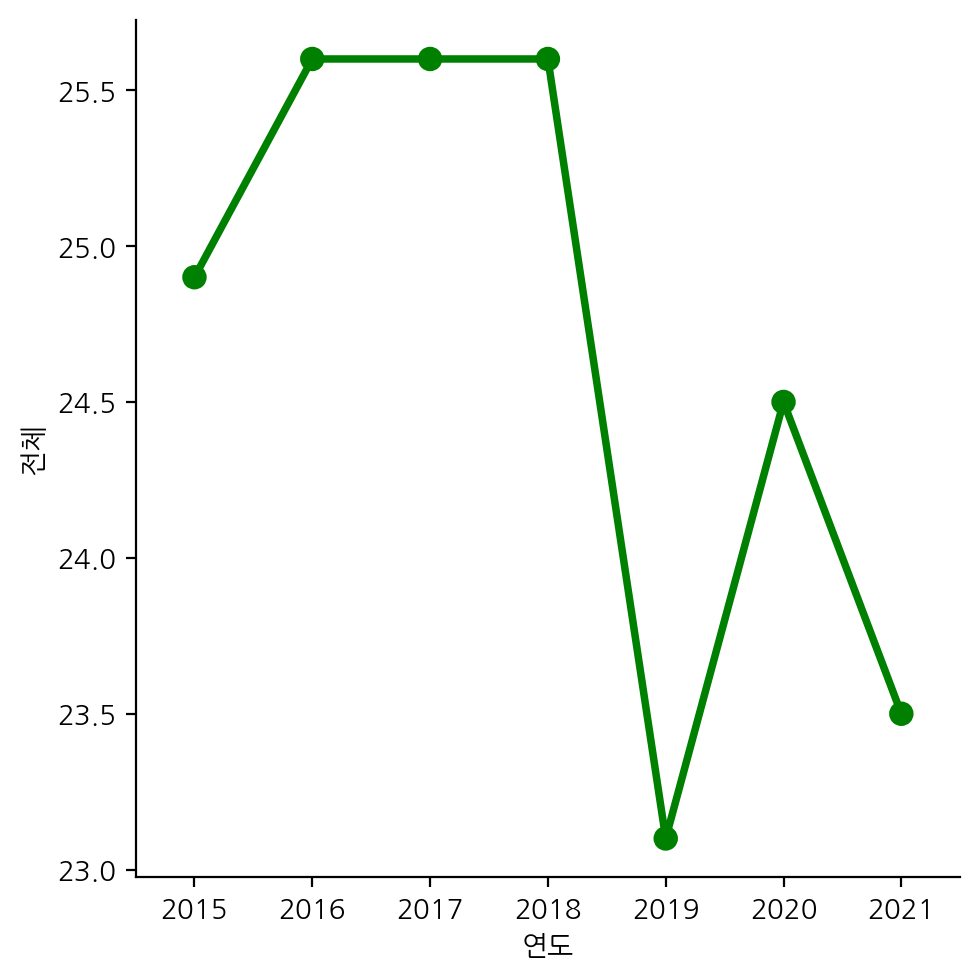

In [15]:
plt.figure(figsize=(10,3))
sns.catplot(data=df[df["질병명"] == "아토피피부염"], x="연도", y="전체", kind="point", errorbar=None, color="green")

## 미세먼지가 청소년 아토피, 천식에 영향을 미칠까?

위에서 전처리 한 서울시 청소년 아토피, 천식 통계와 전국 미세먼지/초미세먼지에 대한 EDA를 진행해보자.

In [16]:
file = glob("data/mise*")[0]
file

'data/misemise_processed.csv'

In [17]:
df_mise = pd.read_csv(file, encoding = "cp949")
df_mise.shape

(416179, 7)

In [18]:
df_mise.head(2)

,지역,측정일시,연도,월,일,PM10,PM25
0,강원 강릉시,20150101,2015,1,1,60.375000,8.625000
1,강원 강릉시,20150102,2015,1,2,30.416667,7.416667


In [19]:
df.head(2)

,연도,질병명,전체,남학생,여학생
0,2015,천식,9.3,11.3,7.1
1,2015,알레르기비염,34.7,34.6,34.9


In [20]:
df_mise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416179 entries, 0 to 416178
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      416179 non-null  object 
 1   측정일시    416179 non-null  int64  
 2   연도      416179 non-null  int64  
 3   월       416179 non-null  int64  
 4   일       416179 non-null  int64  
 5   PM10    416179 non-null  float64
 6   PM25    416179 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 22.2+ MB


In [21]:
# 측정일 별로 미세먼지 그룹화하기
df_mise = df_mise.groupby(["연도"])["PM10","PM25"].mean()
df_mise

/var/folders/vl/mmn9ctlx4m58c_kvrkgwprlm0000gn/T/ipykernel_26112/1207999117.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mise = df_mise.groupby(["연도"])["PM10","PM25"].mean()


,PM10,PM25
연도,,
2015,47.538998,26.527849
2016,45.716695,25.735213
2017,44.899446,24.686479
2018,41.191954,22.881305
2019,40.303908,22.812924
2020,32.833488,18.526752
2021,35.816950,17.749120


In [22]:
df_all = pd.merge(df, df_mise, on = "연도", how = "inner")
df_all.shape

(21, 7)

In [23]:
df_gb=df_all.groupby(["연도", "질병명"])["전체"].mean().unstack().reset_index()
df_gb

질병명,연도,아토피피부염,알레르기비염,천식
0,2015,24.9,34.7,9.3
1,2016,25.6,37.2,9.4
2,2017,25.6,37.0,9.4
3,2018,25.6,38.0,8.9
4,2019,23.1,37.4,7.4
5,2020,24.5,37.2,6.7
6,2021,23.5,36.5,6.1


In [24]:
df_all = df_gb.merge(df_mise, on= "연도", how = "inner")
df_all

,연도,아토피피부염,알레르기비염,천식,PM10,PM25
0,2015,24.9,34.7,9.3,47.538998,26.527849
1,2016,25.6,37.2,9.4,45.716695,25.735213
2,2017,25.6,37.0,9.4,44.899446,24.686479
3,2018,25.6,38.0,8.9,41.191954,22.881305
4,2019,23.1,37.4,7.4,40.303908,22.812924
5,2020,24.5,37.2,6.7,32.833488,18.526752
6,2021,23.5,36.5,6.1,35.816950,17.749120


In [25]:
# df_all.to_csv("data/mise_health.csv",encoding="cp949",index=False)

In [26]:
df_all.isnull().sum()

연도        0
아토피피부염    0
알레르기비염    0
천식        0
PM10      0
PM25      0
dtype: int64

In [27]:
df_all.describe()

,연도,아토피피부염,알레르기비염,천식,PM10,PM25
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2018.000000,24.685714,36.857143,8.171429,41.185920,22.702806
std,2.160247,1.041519,1.051756,1.406786,5.385888,3.410372
min,2015.000000,23.100000,34.700000,6.100000,32.833488,17.749120
25%,2016.500000,24.000000,36.750000,7.050000,38.060429,20.669838
50%,2018.000000,24.900000,37.200000,8.900000,41.191954,22.881305
75%,2019.500000,25.600000,37.300000,9.350000,45.308070,25.210846
max,2021.000000,25.600000,38.000000,9.400000,47.538998,26.527849


<Figure size 1500x800 with 0 Axes>

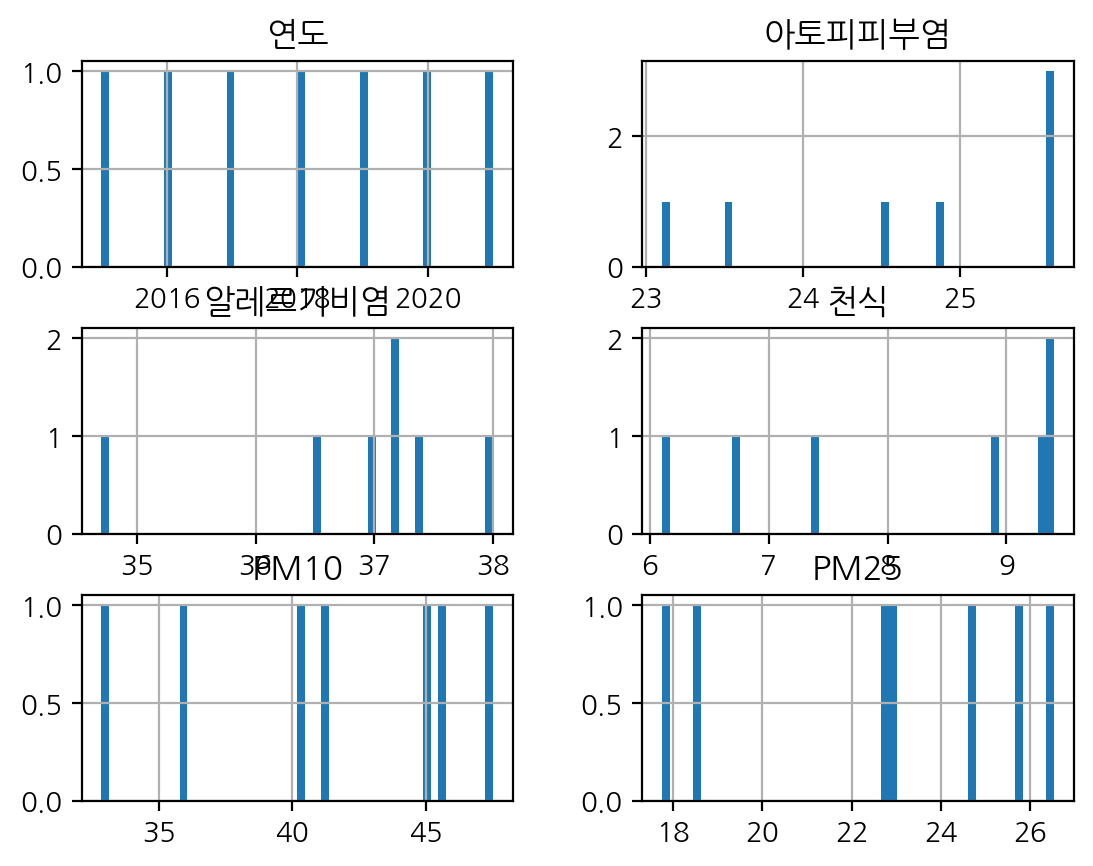

In [28]:
plt.figure(figsize = (15, 8))
df_all.hist(bins = 50);

In [29]:
corr = df_all.corr()
corr

,연도,아토피피부염,알레르기비염,천식,PM10,PM25
연도,1.000000,-0.659277,0.425460,-0.932322,-0.938676,-0.964328
아토피피부염,-0.659277,1.000000,0.079986,0.808441,0.541355,0.565113
알레르기비염,0.425460,0.079986,1.000000,-0.133885,-0.383628,-0.293985
천식,-0.932322,0.808441,-0.133885,1.000000,0.910563,0.935543
PM10,-0.938676,0.541355,-0.383628,0.910563,1.000000,0.968962
PM25,-0.964328,0.565113,-0.293985,0.935543,0.968962,1.000000


In [30]:
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

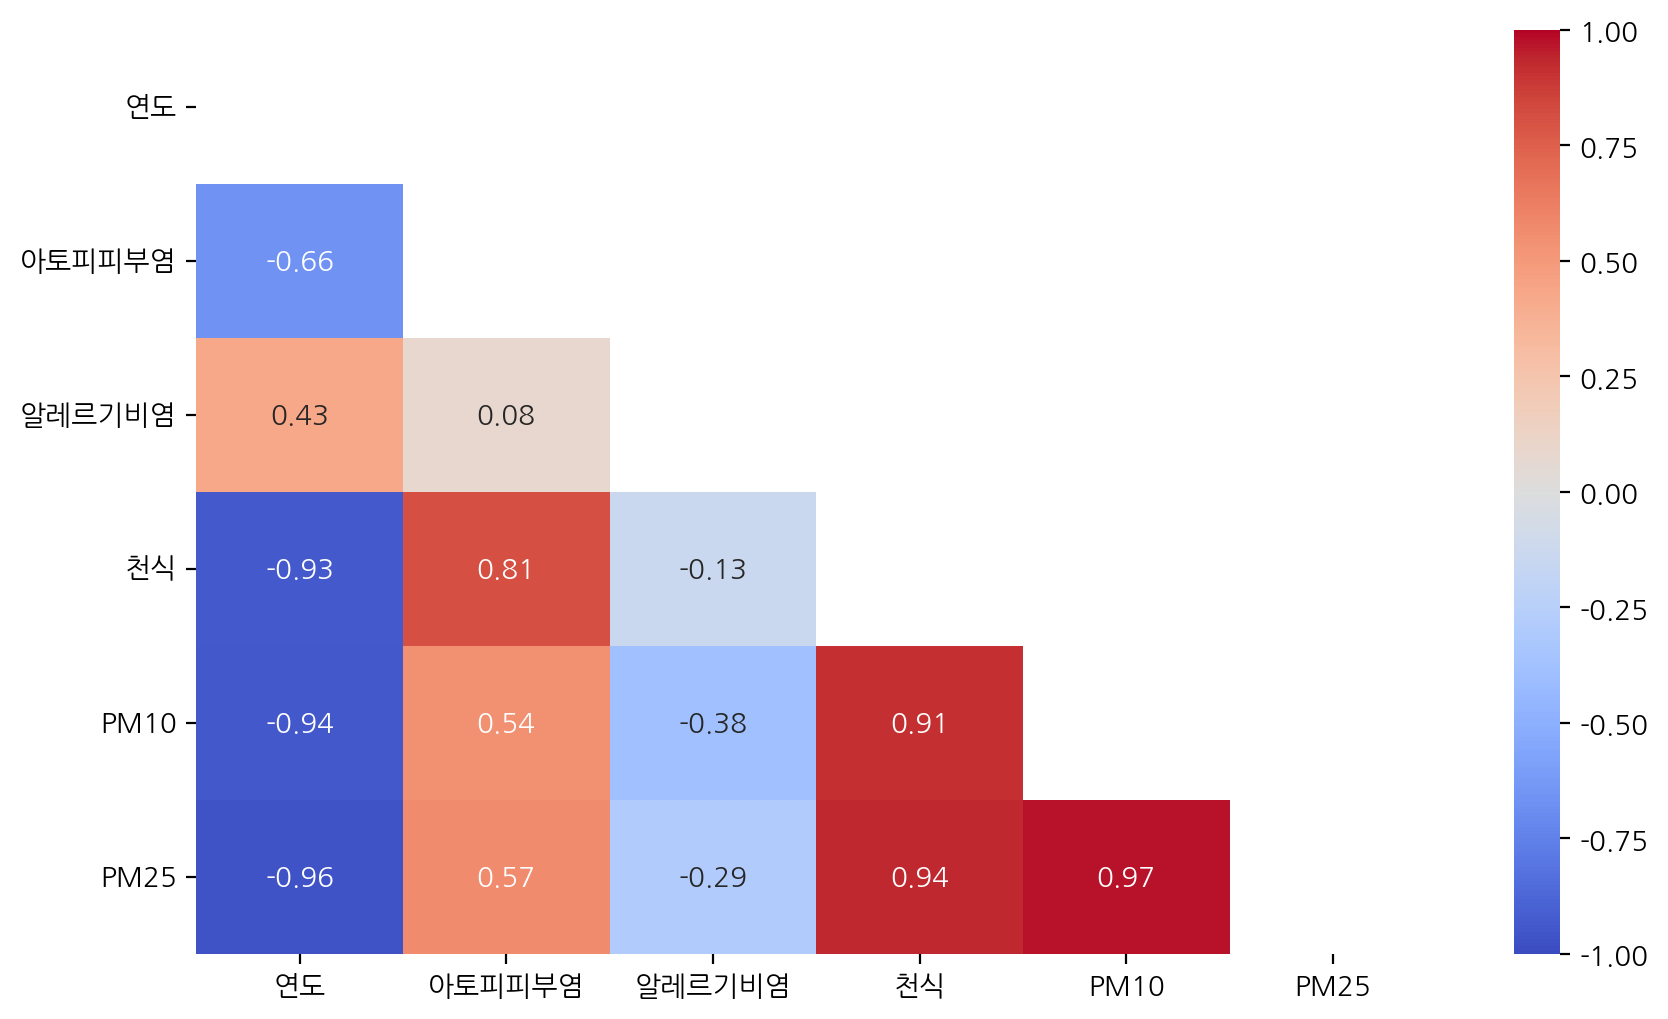

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap = "coolwarm", vmin=-1, vmax=1, mask=mask);

In [32]:
# 판다스로 이중축 그래프 시각화하기

# x = df_all.연도
# y1 = df_all.천식
# y2 = df_all.PM10

# fig = plt.figure(figsize = (10, 4))

# ax1 = fig.add_subplot(1,1,1)
# plt.plot(x,y1, "b", label = "천식" , lw = 1.5)
# plt.legend(loc = 2)
# plt.ylabel("천식")

# # 두번째 차트
# ax2 = ax1.twinx()
# ax2.plot(x, y2, "r", label = "PM10", lw = 1.5)
# plt.legend(loc = 4)
# plt.ylabel("PM10")

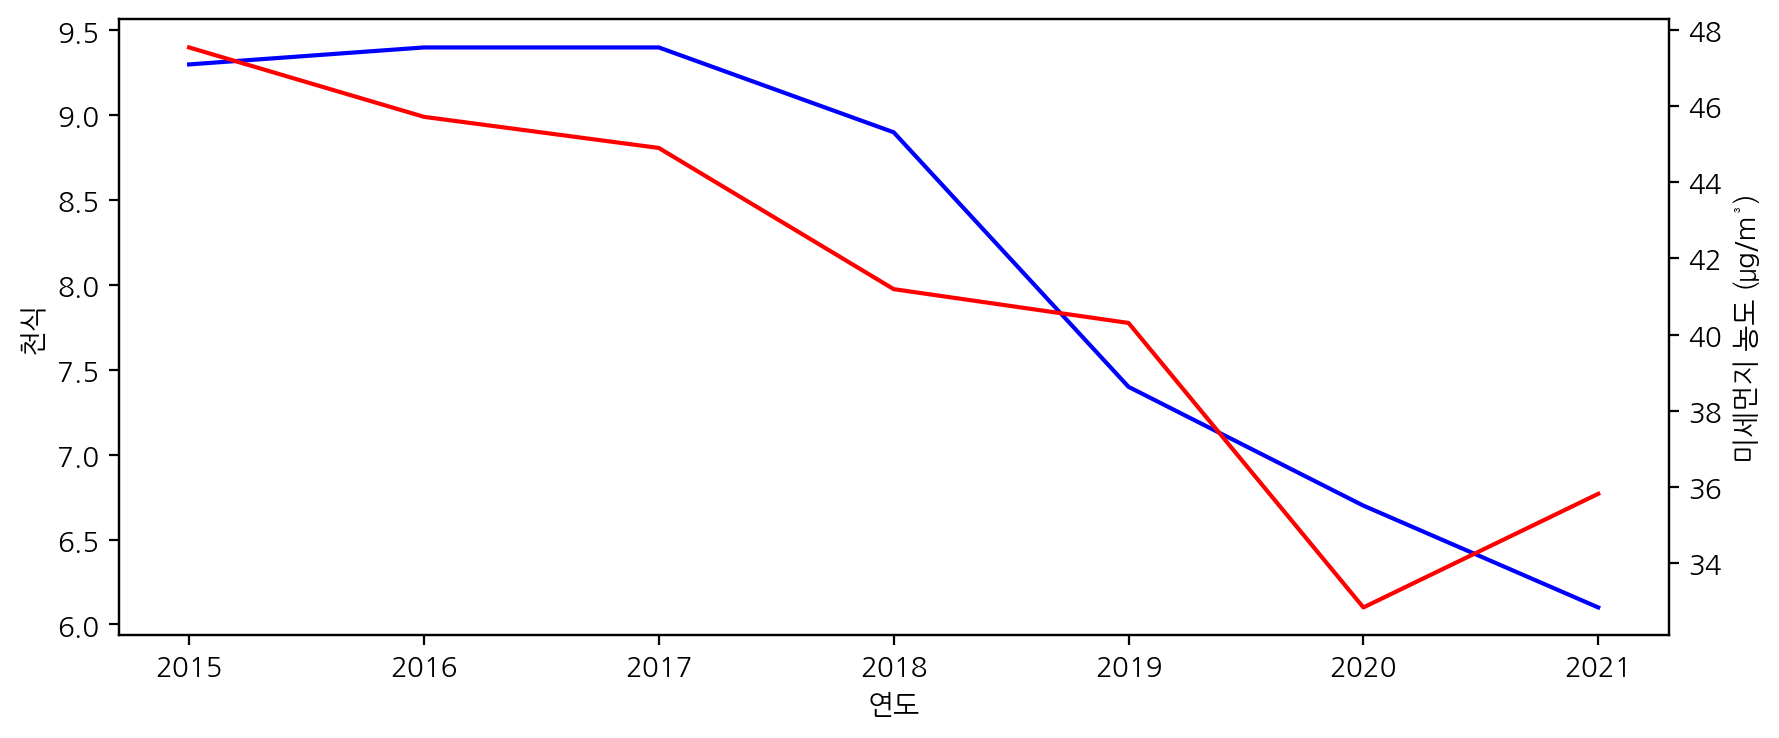

In [33]:
# seaborn으로 이중축 그래프 시각화하기 (천식 - 미세먼지)

fig = plt.figure(figsize = (10, 4))

ax1 = fig.add_subplot(1,1,1);
ax2 = ax1.twinx();
chart1 = sns.lineplot(data = df_all, ax = ax1, x = "연도", y = "천식", color = "blue");
chart2 = sns.lineplot(data = df_all, ax = ax2, x = "연도", y = "PM10", color = "red");
ax1.set_ylabel("천식");
ax2.set_ylabel("미세먼지 농도 (μg/m³)");

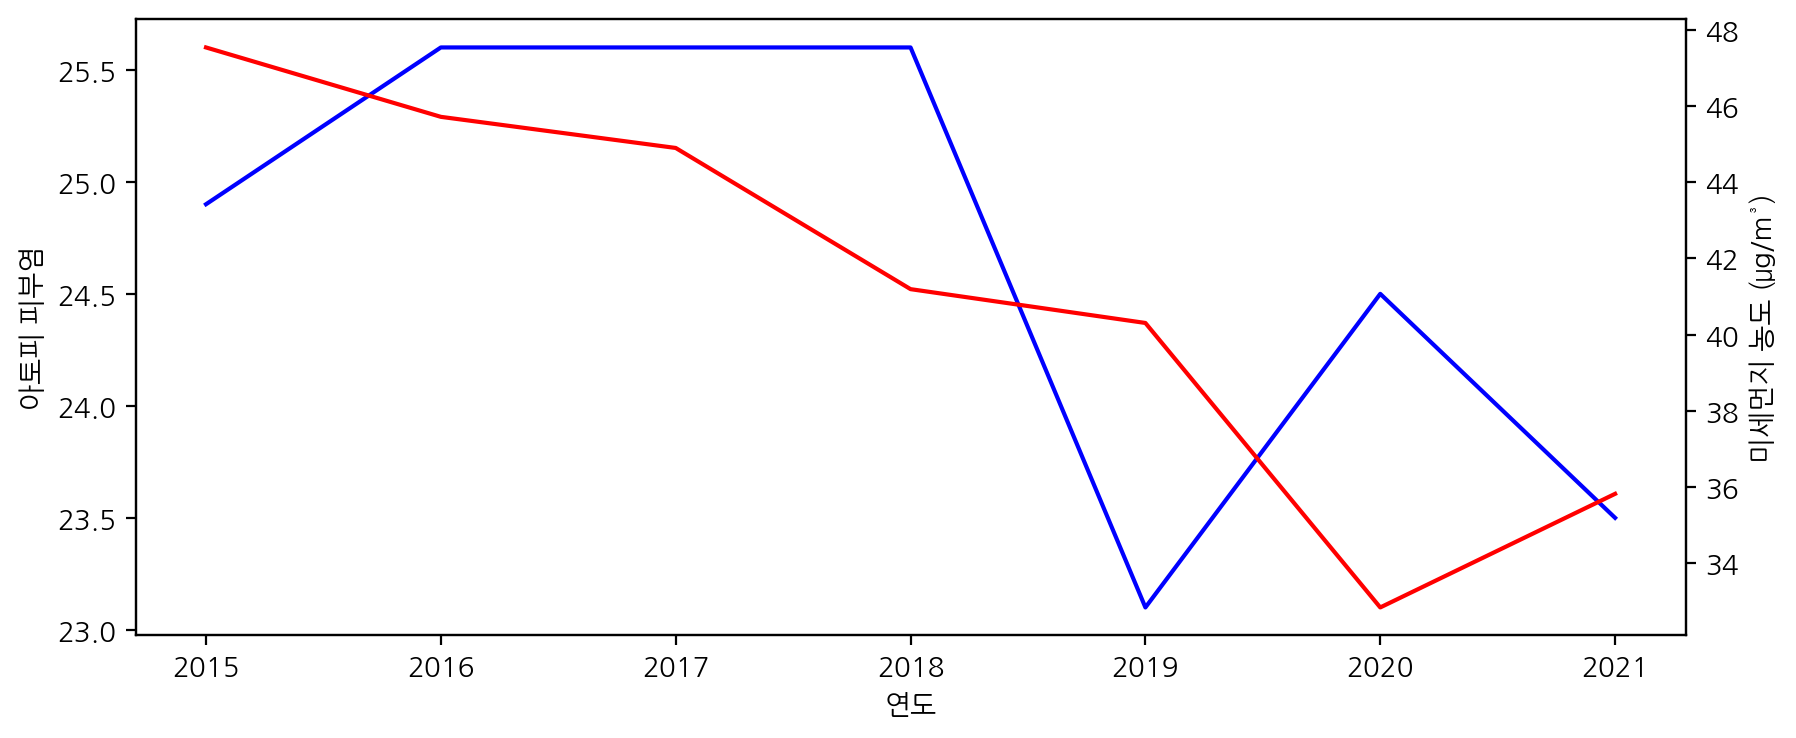

In [34]:
# seaborn으로 이중축 그래프 시각화하기 (아토피피부염 - 미세먼지)

fig = plt.figure(figsize = (10, 4))

ax1 = fig.add_subplot(1,1,1);
ax2 = ax1.twinx();
chart1 = sns.lineplot(data = df_all, ax = ax1, x = "연도", y = "아토피피부염", color = "blue");
chart2 = sns.lineplot(data = df_all, ax = ax2, x = "연도", y = "PM10", color = "red");
ax1.set_ylabel("아토피 피부염");
ax2.set_ylabel("미세먼지 농도 (μg/m³)");

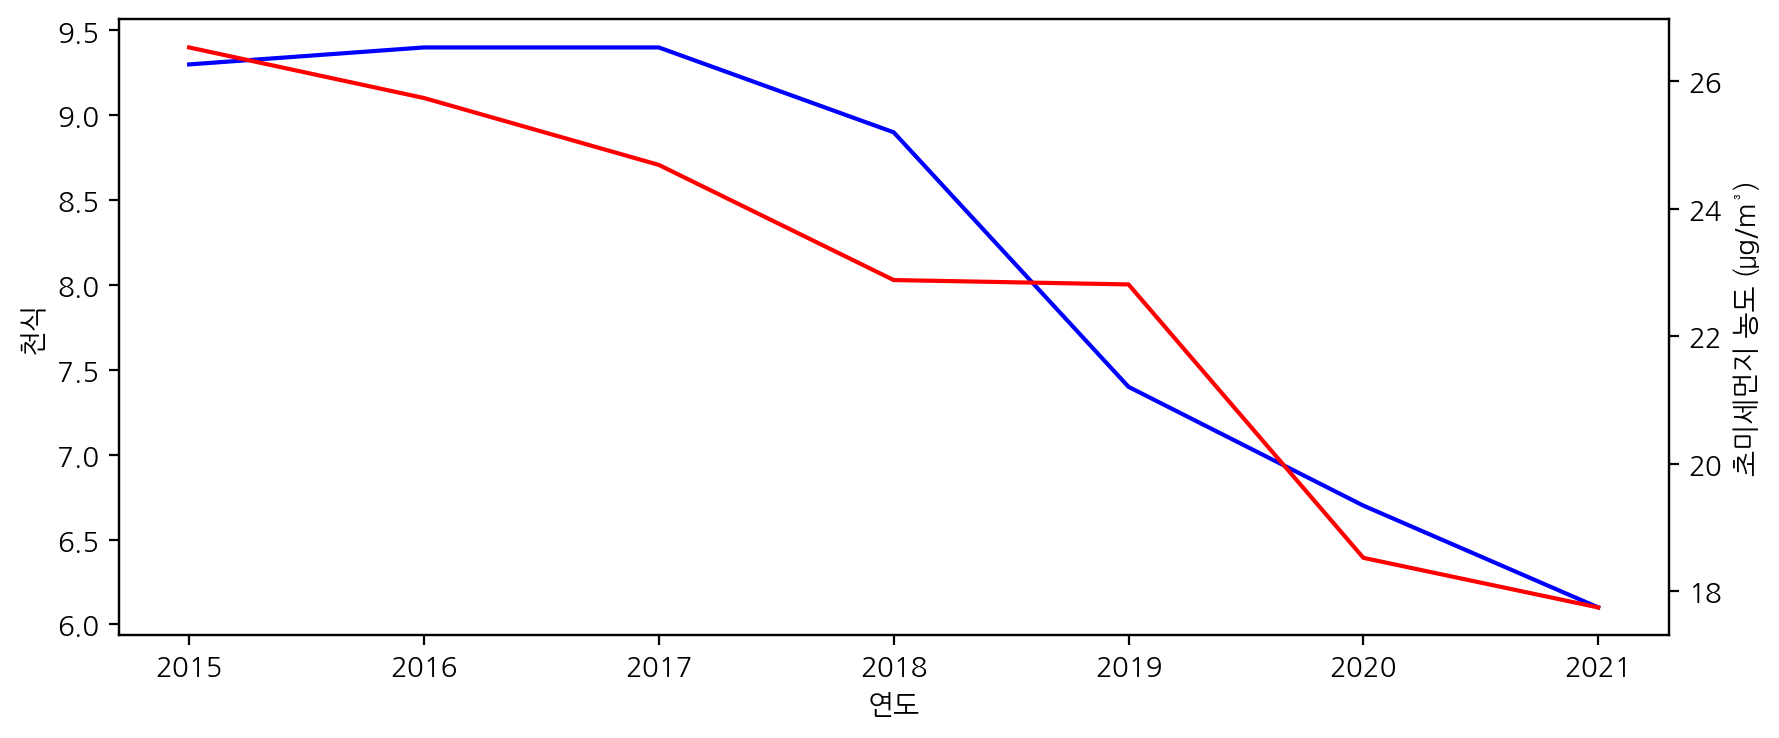

In [35]:
# seaborn으로 이중축 그래프 시각화하기 (천식 - 초미세먼지)

fig = plt.figure(figsize = (10, 4))

ax1 = fig.add_subplot(1,1,1);
ax2 = ax1.twinx();
chart1 = sns.lineplot(data = df_all, ax = ax1, x = "연도", y = "천식", color = "blue");
chart2 = sns.lineplot(data = df_all, ax = ax2, x = "연도", y = "PM25", color = "red");
ax1.set_ylabel("천식");
ax2.set_ylabel("초미세먼지 농도 (μg/m³)");

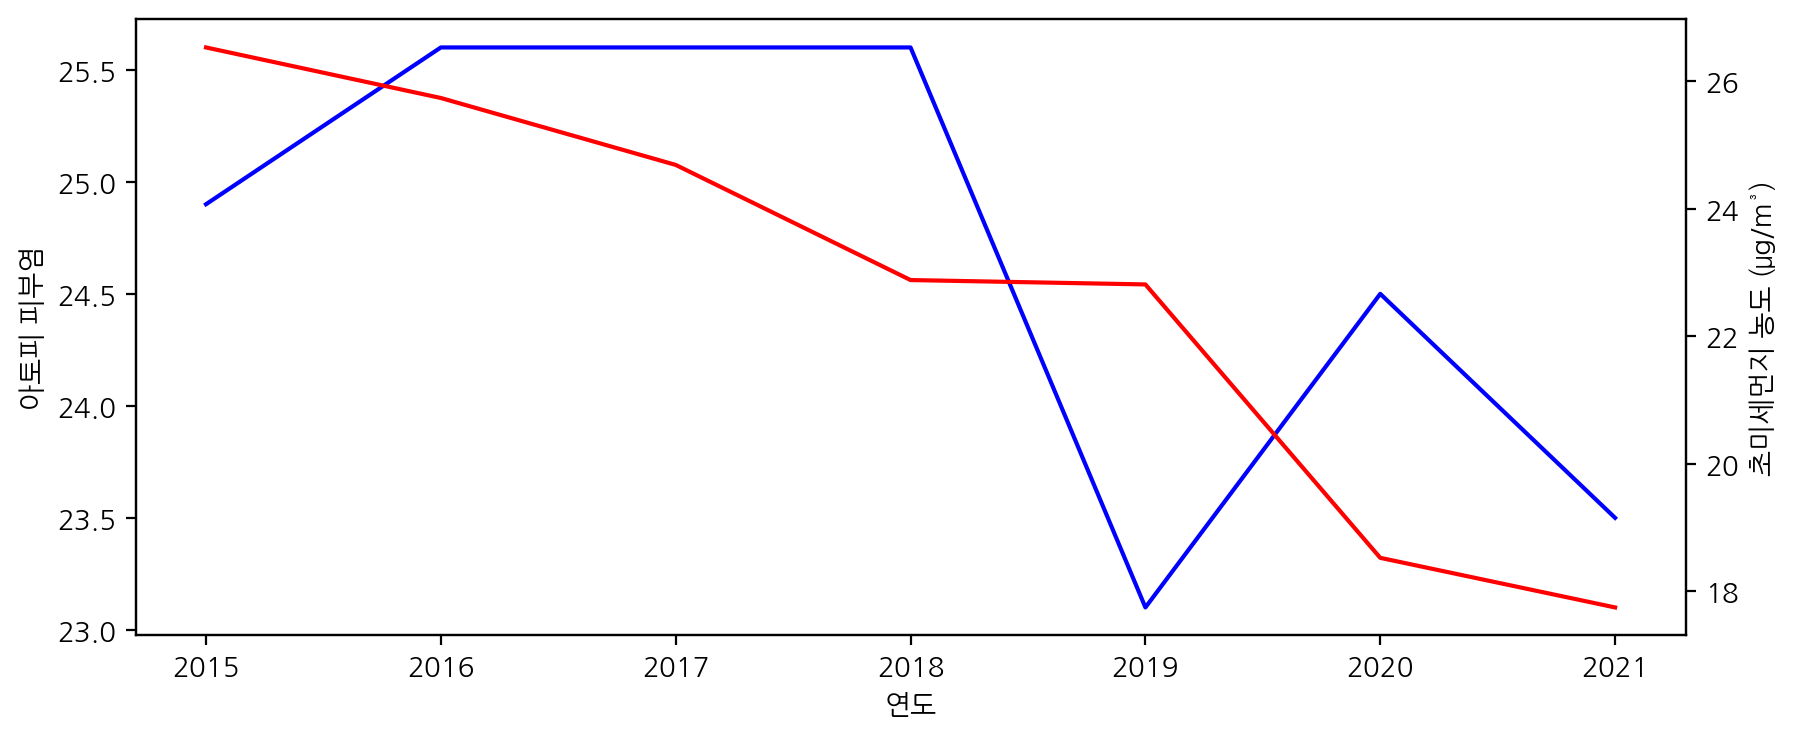

In [36]:
# seaborn으로 이중축 그래프 시각화하기 (아토피피부염 - 초미세먼지)

fig = plt.figure(figsize = (10, 4))

ax1 = fig.add_subplot(1,1,1);
ax2 = ax1.twinx();
chart1 = sns.lineplot(data = df_all, ax = ax1, x = "연도", y = "아토피피부염", color = "blue");
chart2 = sns.lineplot(data = df_all, ax = ax2, x = "연도", y = "PM25", color = "red");
ax1.set_ylabel("아토피 피부염");
ax2.set_ylabel("초미세먼지 농도 (μg/m³)");

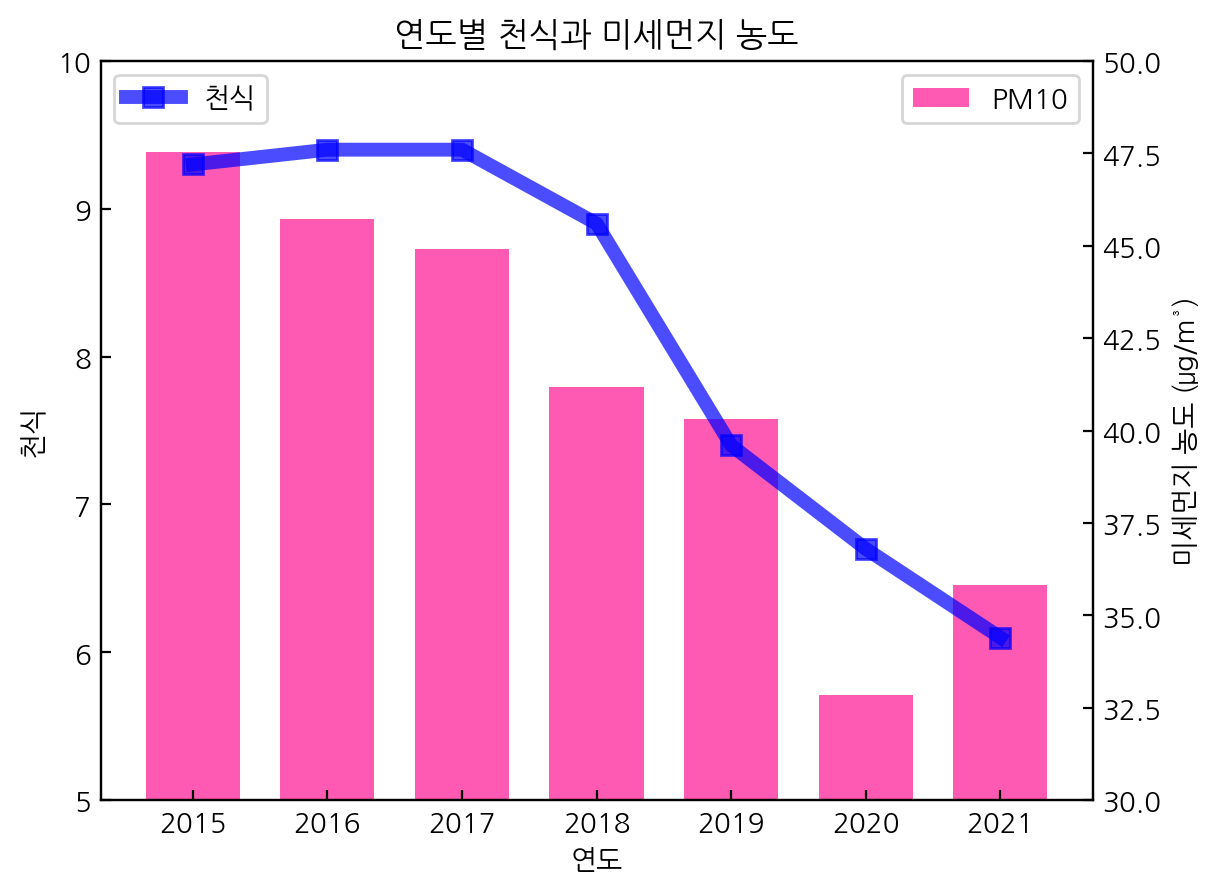

In [37]:
# 연도별 천식과 미세먼지의 상관관계 시각화 

x = df_all.연도
y1 = df_all.천식
y2 = df_all.PM10

fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.title("연도별 천식과 미세먼지 농도")

ax1.plot(x, y1, '-s', color='blue', markersize=7, linewidth=5, alpha=0.7, label='천식')
ax1.set_ylim(5, 10)
ax1.set_xlabel('연도')
ax1.set_ylabel('천식')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='PM10', alpha=0.7, width=0.7)
ax2.set_ylim(30, 50)
ax2.set_ylabel(r'미세먼지 농도 (μg/m³)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

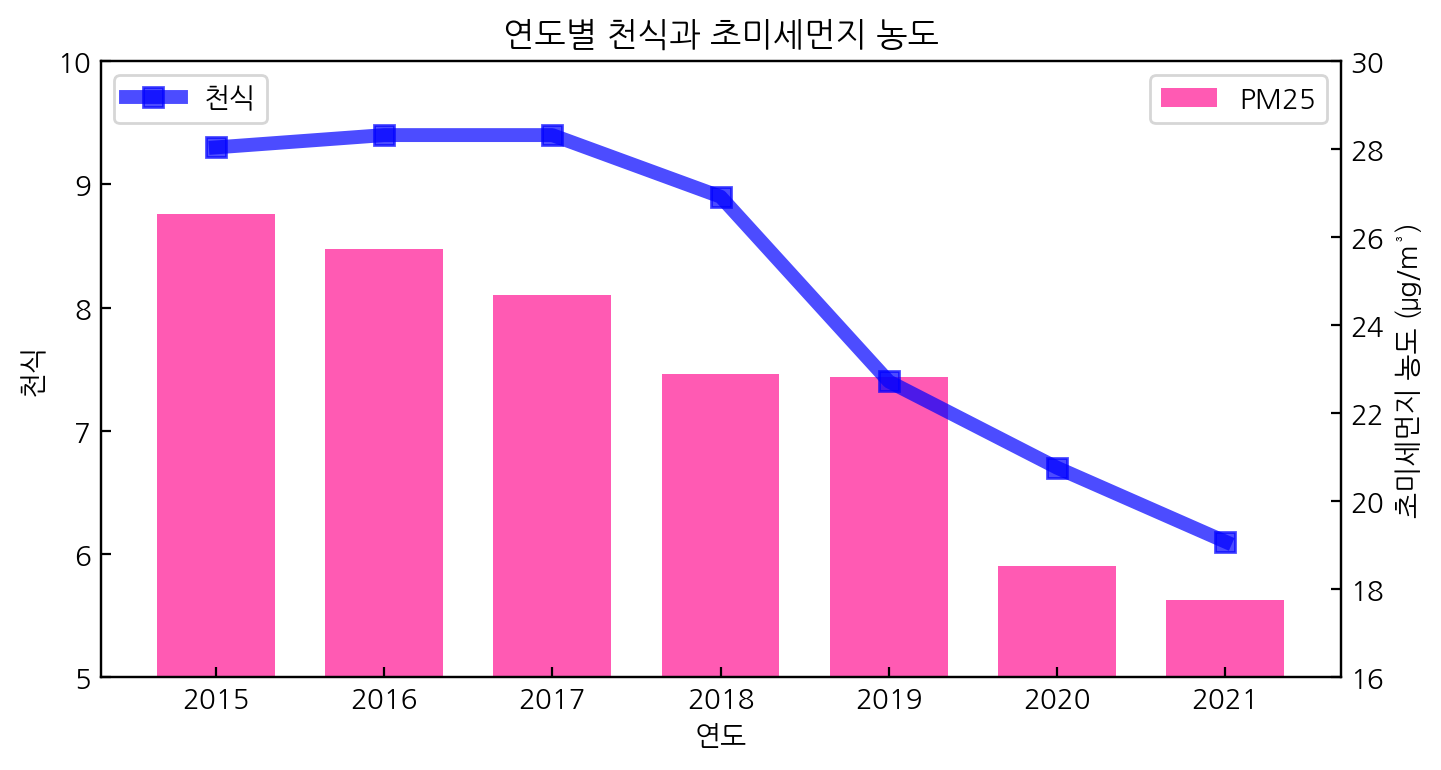

In [38]:
# 연도별 천식과 초미세먼지의 상관관계 시각화 

x = df_all.연도
y1 = df_all.천식
y2 = df_all.PM25

fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.title("연도별 천식과 초미세먼지 농도")

ax1.plot(x, y1, '-s', color='blue', markersize=7, linewidth=5, alpha=0.7, label='천식')
ax1.set_ylim(5, 10)
ax1.set_xlabel('연도')
ax1.set_ylabel('천식')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='PM25', alpha=0.7, width=0.7)
ax2.set_ylim(16, 30)
ax2.set_ylabel(r'초미세먼지 농도 (μg/m³)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

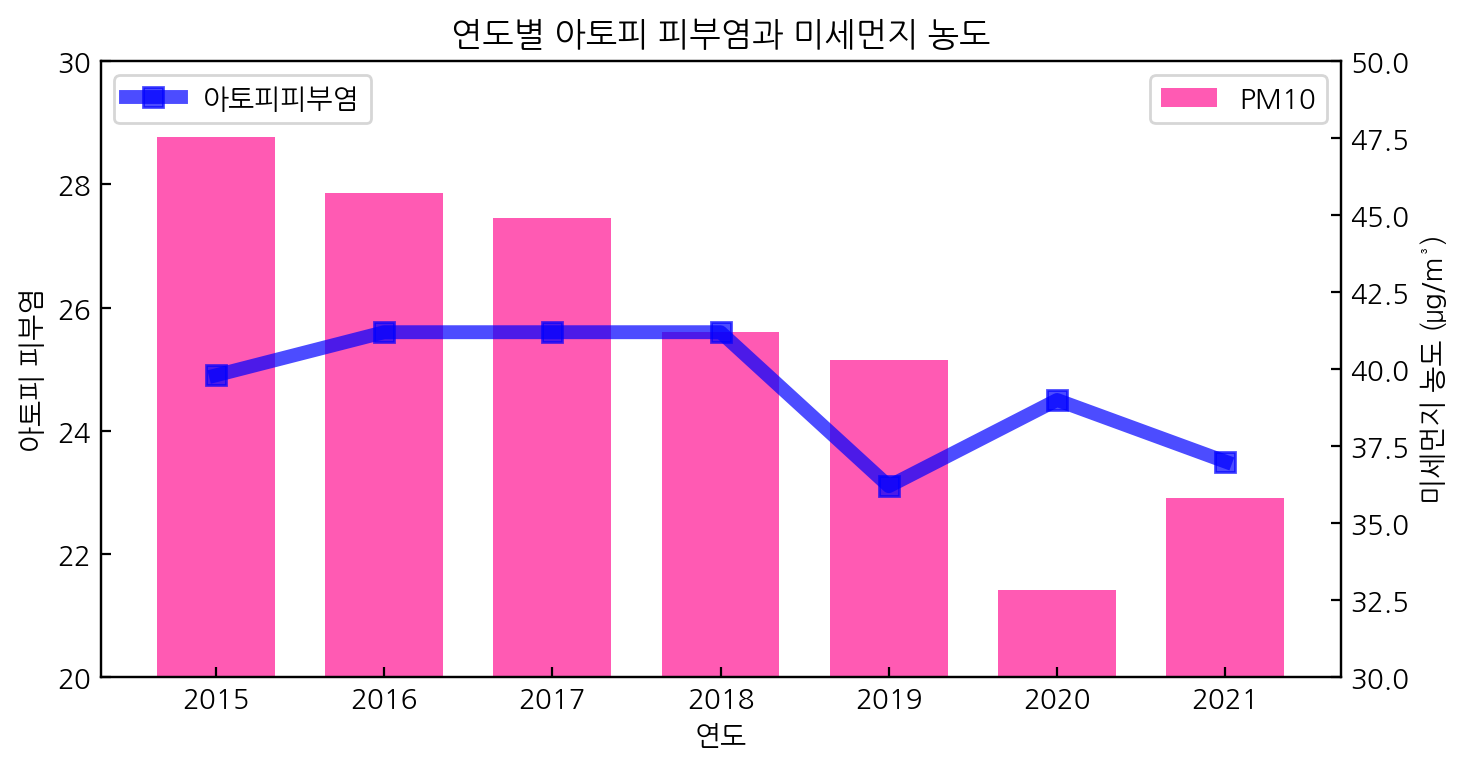

In [39]:
# 연도별 아토피피부염과 미세먼지의 상관관계 시각화 

x = df_all.연도
y1 = df_all.아토피피부염
y2 = df_all.PM10

fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.title("연도별 아토피 피부염과 미세먼지 농도")

ax1.plot(x, y1, '-s', color='blue', markersize=7, linewidth=5, alpha=0.7, label='아토피피부염')
ax1.set_ylim(20, 30)
ax1.set_xlabel('연도')
ax1.set_ylabel('아토피 피부염')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='PM10', alpha=0.7, width=0.7)
ax2.set_ylim(30, 50)
ax2.set_ylabel(r'미세먼지 농도 (μg/m³)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

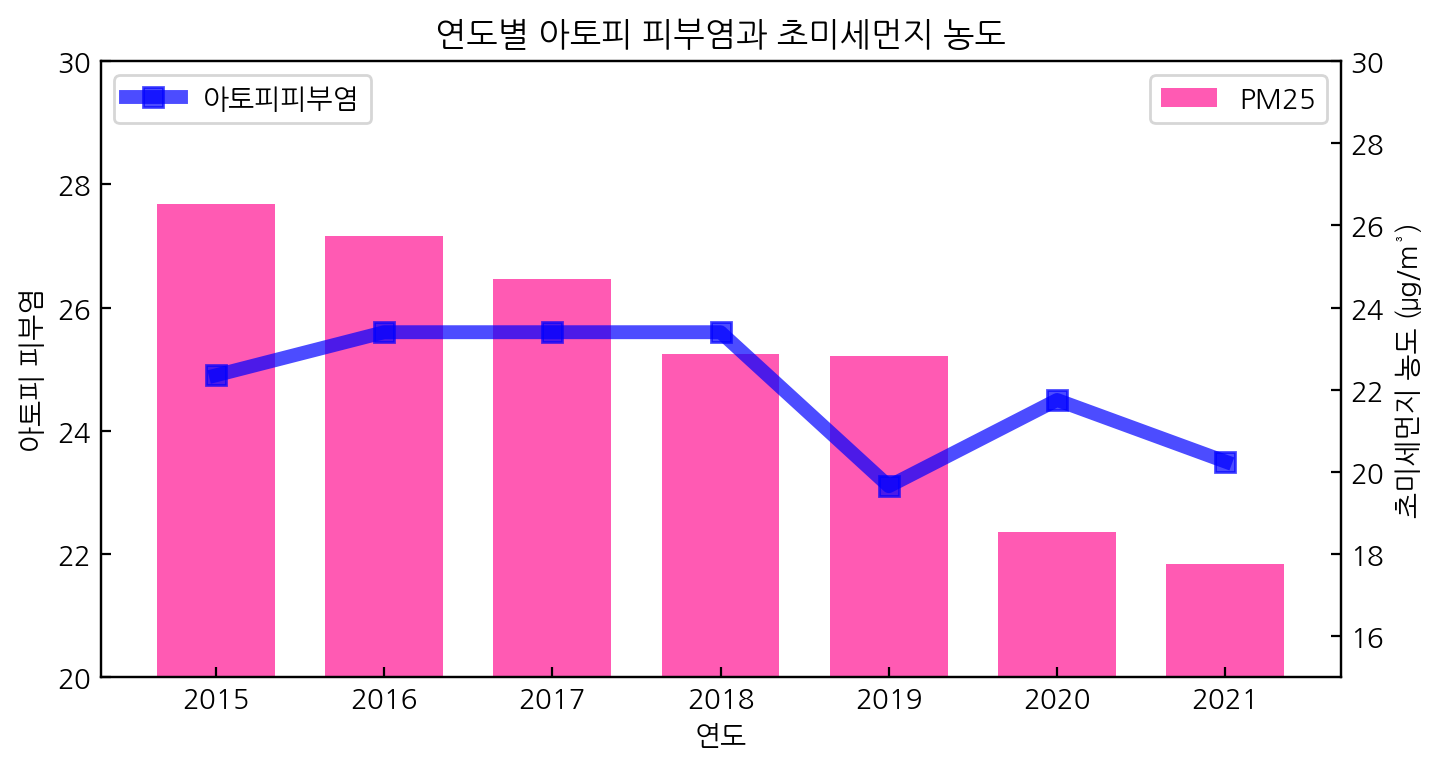

In [40]:
# 연도별 아토피 피부염과 초미세먼지의 상관관계 시각화 

x = df_all.연도
y1 = df_all.아토피피부염
y2 = df_all.PM25

fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.title("연도별 아토피 피부염과 초미세먼지 농도")

ax1.plot(x, y1, '-s', color='blue', markersize=7, linewidth=5, alpha=0.7, label='아토피피부염')
ax1.set_ylim(20, 30)
ax1.set_xlabel('연도')
ax1.set_ylabel('아토피 피부염')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='PM25', alpha=0.7, width=0.7)
ax2.set_ylim(15, 30)
ax2.set_ylabel(r'초미세먼지 농도 (μg/m³)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## 사망원인(104항목)/성/월별 사망자수 통계

출처: 통계청 사회통계국 인구동향과
* url: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B34E02&vw_cd=MT_ZTITLE&list_id=F_27&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do

용어 설명:
* 악성신생물 (암)
: 폐암, 위암, 간암

* 순환기계통의 질환
: 심장 질환(부정맥, 심부전증), 허혈성 심장 질환(협심증, 심근경색증), 기타 심장 질환, 뇌 혈관 질환

* 호흡기계통의 질환
: 만성하기도질환(기관지염, 천식, 폐기종)

In [41]:
file_name = glob("data/사망원인*.csv")[0]
file_name

'data/사망원인.csv'

In [42]:
df_health = pd.read_csv(file_name, encoding = "cp949")
df_health.shape

(84, 12)

In [43]:
df_health.head(2)

,시점,성별,신생물 (C00-D48),기관 기관지 및 폐의 악성신생물 (C33-C34),순환계통의 질환 (I00-I99),허혈성 심장 질환 (I20-I25),뇌혈관 질환 (I60-I69),호흡계통의 질환 (J00-J98U04),폐렴 (J12-J18),만성 하기도 질환 (J40-J47),나머지 호흡계통 질환 (Re. J00- J98),피부 및 피하조직의 질환 (L00-L98)
0,2015.01,계,6786,1522,5614,1412,2301,2539,1361,689,473,46
1,2015.02,계,5973,1352,5242,1246,2157,2830,1502,795,465,45


In [44]:
df_health = df_health.drop(["나머지 호흡계통 질환 (Re. J00- J98)"], axis = 1)
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   시점                           84 non-null     float64
 1   성별                           84 non-null     object 
 2   신생물 (C00-D48)                84 non-null     int64  
 3   기관 기관지 및 폐의 악성신생물 (C33-C34)  84 non-null     int64  
 4   순환계통의 질환 (I00-I99)           84 non-null     int64  
 5   허혈성 심장 질환 (I20-I25)          84 non-null     int64  
 6   뇌혈관 질환 (I60-I69)             84 non-null     int64  
 7   호흡계통의 질환 (J00-J98U04)        84 non-null     int64  
 8   폐렴 (J12-J18)                 84 non-null     int64  
 9   만성 하기도 질환 (J40-J47)          84 non-null     int64  
 10  피부 및 피하조직의 질환 (L00-L98)      84 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 7.3+ KB


In [45]:
df_health["시점"] = df_health["시점"].astype(str)
df_health["연도"] = df_health["시점"].str.split(".", expand=True)[0]
df_health["월"] = df_health["시점"].str.split(".", expand=True)[1].astype(int)
df_health["월"] = df_health["월"].astype(str)
df_health["시점"] = df_health["연도"] + "." + df_health["월"]
df_health.head(2)

,시점,성별,신생물 (C00-D48),기관 기관지 및 폐의 악성신생물 (C33-C34),순환계통의 질환 (I00-I99),허혈성 심장 질환 (I20-I25),뇌혈관 질환 (I60-I69),호흡계통의 질환 (J00-J98U04),폐렴 (J12-J18),만성 하기도 질환 (J40-J47),피부 및 피하조직의 질환 (L00-L98),연도,월
0,2015.1,계,6786,1522,5614,1412,2301,2539,1361,689,46,2015,1
1,2015.2,계,5973,1352,5242,1246,2157,2830,1502,795,45,2015,2


In [46]:
df_health["연도"] = df_health["연도"].astype(int)
df_health["월"] = df_health["월"].astype(int)
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   시점                           84 non-null     object
 1   성별                           84 non-null     object
 2   신생물 (C00-D48)                84 non-null     int64 
 3   기관 기관지 및 폐의 악성신생물 (C33-C34)  84 non-null     int64 
 4   순환계통의 질환 (I00-I99)           84 non-null     int64 
 5   허혈성 심장 질환 (I20-I25)          84 non-null     int64 
 6   뇌혈관 질환 (I60-I69)             84 non-null     int64 
 7   호흡계통의 질환 (J00-J98U04)        84 non-null     int64 
 8   폐렴 (J12-J18)                 84 non-null     int64 
 9   만성 하기도 질환 (J40-J47)          84 non-null     int64 
 10  피부 및 피하조직의 질환 (L00-L98)      84 non-null     int64 
 11  연도                           84 non-null     int64 
 12  월                            84 non-null     int64 
dtypes: int64(11), object(2)
memory usage:

In [47]:
df_health.isnull().sum()

시점                             0
성별                             0
신생물 (C00-D48)                  0
기관 기관지 및 폐의 악성신생물 (C33-C34)    0
순환계통의 질환 (I00-I99)             0
허혈성 심장 질환 (I20-I25)            0
뇌혈관 질환 (I60-I69)               0
호흡계통의 질환 (J00-J98U04)          0
폐렴 (J12-J18)                   0
만성 하기도 질환 (J40-J47)            0
피부 및 피하조직의 질환 (L00-L98)        0
연도                             0
월                              0
dtype: int64

In [48]:
df_h = df_health.rename(columns = {"신생물 (C00-D48)" : "각종 암", "기관 기관지 및 폐의 악성신생물 (C33-C34)" : "폐암",
                          "순환계통의 질환 (I00-I99)" : "순환 질환", "허혈성 심장 질환 (I20-I25)" : "협심증",
                          "뇌혈관 질환 (I60-I69)" : "뇌혈관 질환", "호흡계통의 질환 (J00-J98U04)" : "호흡 질환", 
                          "폐렴 (J12-J18)" : "폐렴", "만성 하기도 질환 (J40-J47)" : "만성 하기도 질환", 
                          "피부 및 피하조직의 질환 (L00-L98)" : "피부 질환"})
df_h.head()

,시점,성별,각종 암,폐암,순환 질환,협심증,뇌혈관 질환,호흡 질환,폐렴,만성 하기도 질환,피부 질환,연도,월
0,2015.1,계,6786,1522,5614,1412,2301,2539,1361,689,46,2015,1
1,2015.2,계,5973,1352,5242,1246,2157,2830,1502,795,45,2015,2
2,2015.3,계,6838,1555,5801,1402,2363,3325,1824,859,45,2015,3
3,2015.4,계,6376,1429,5191,1281,2123,2629,1371,720,56,2015,4
4,2015.5,계,6614,1482,4801,1170,1969,2382,1247,666,42,2015,5


In [49]:
df_h = pd.melt(df_h, id_vars = ["시점", "연도", "월"], value_vars = ["각종 암", "폐암", "순환 질환", "협심증", "뇌혈관 질환",
             "호흡 질환", "폐렴", "만성 하기도 질환", "피부 질환"], var_name = "질환", value_name = "사망자 수")

df_h.head(2)

,시점,연도,월,질환,사망자 수
0,2015.1,2015,1,각종 암,6786
1,2015.2,2015,2,각종 암,5973


In [50]:
df_h = df_h.drop(["월"], axis = 1)
df_h.head(2)

,시점,연도,질환,사망자 수
0,2015.1,2015,각종 암,6786
1,2015.2,2015,각종 암,5973


<AxesSubplot:title={'center':'질환별 평균 사망자 수'}, xlabel='질환'>

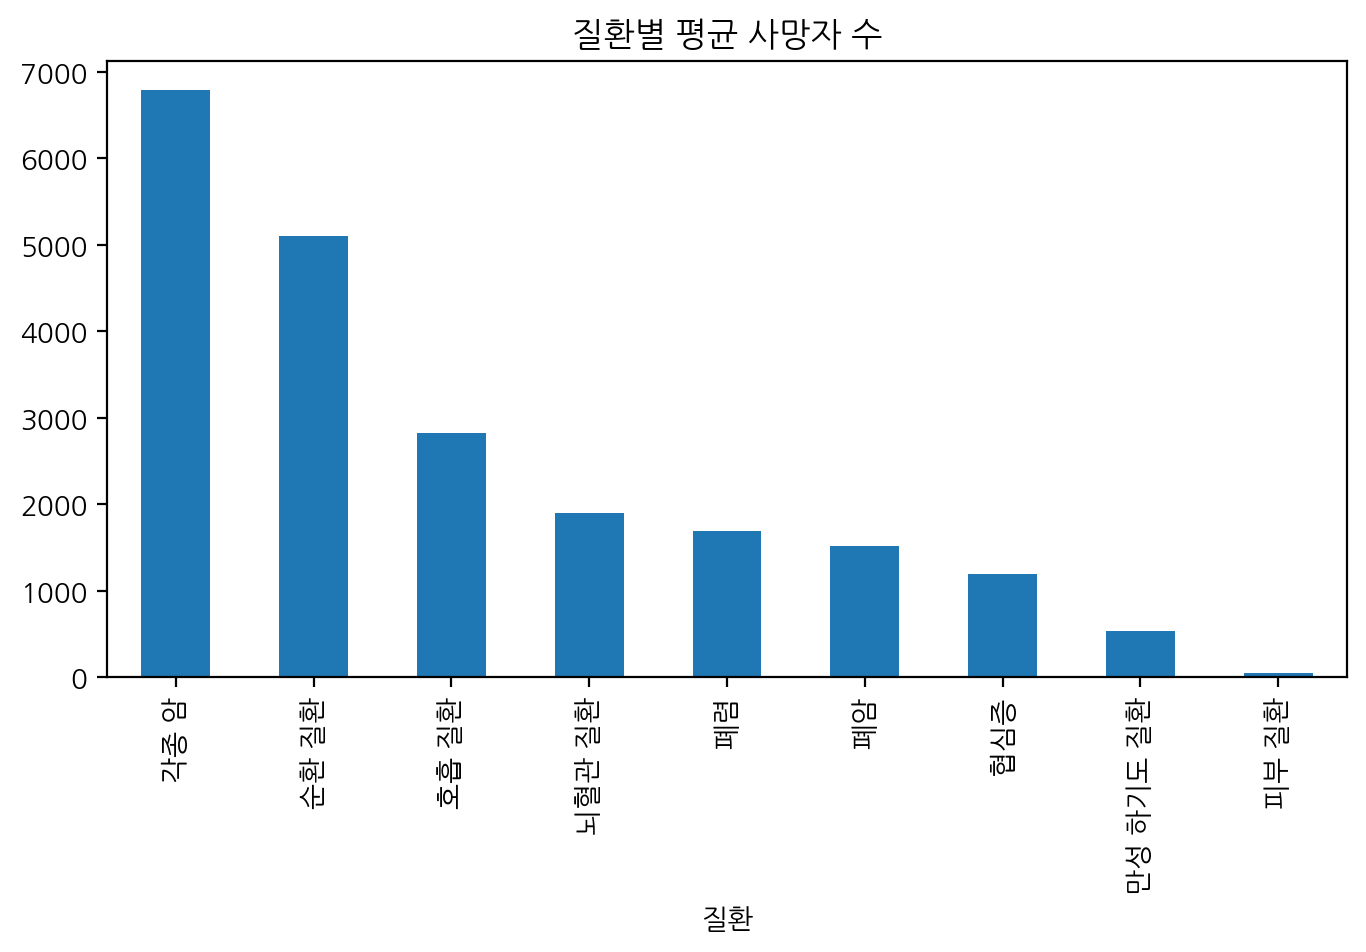

In [51]:
df_h.groupby(["질환"])["사망자 수"].mean().sort_values(ascending = False).plot(kind = "bar", title = "질환별 평균 사망자 수")

In [52]:
df_m = pd.merge(df_mise, df_h, on = "연도", how = "inner")
df_m.head(2)

,연도,PM10,PM25,시점,질환,사망자 수
0,2015,47.538998,26.527849,2015.1,각종 암,6786
1,2015,47.538998,26.527849,2015.2,각종 암,5973


In [53]:
df_g = df_m.groupby(["연도", "질환"])["사망자 수"].mean().unstack().reset_index()
df_g

질환,연도,각종 암,뇌혈관 질환,만성 하기도 질환,순환 질환,폐렴,폐암,피부 질환,협심증,호흡 질환
0,2015,6523.416667,2037.916667,628.166667,4961.916667,1226.500000,1449.916667,39.166667,1227.000000,2317.166667
1,2016,6644.083333,1951.250000,582.666667,5032.333333,1373.000000,1496.916667,43.166667,1221.166667,2450.333333
2,2017,6693.333333,1895.416667,562.500000,5105.500000,1614.833333,1498.333333,51.666667,1188.083333,2720.333333
3,2018,6728.916667,1911.666667,550.666667,5245.500000,1940.000000,1487.666667,51.000000,1208.333333,3146.916667
4,2019,6903.666667,1798.833333,514.666667,5021.000000,1930.666667,1547.833333,51.416667,1141.583333,3054.583333
5,2020,6981.333333,1821.666667,472.333333,5183.000000,1854.750000,1556.083333,47.333333,1171.333333,3030.666667
6,2021,7030.250000,1883.916667,446.416667,5197.500000,1901.000000,1575.166667,44.416667,1176.250000,3069.250000


In [54]:
df_gg = df_g.merge(df_mise, on= "연도", how = "inner")
df_gg

,연도,각종 암,뇌혈관 질환,만성 하기도 질환,순환 질환,폐렴,폐암,피부 질환,협심증,호흡 질환,PM10,PM25
0,2015,6523.416667,2037.916667,628.166667,4961.916667,1226.500000,1449.916667,39.166667,1227.000000,2317.166667,47.538998,26.527849
1,2016,6644.083333,1951.250000,582.666667,5032.333333,1373.000000,1496.916667,43.166667,1221.166667,2450.333333,45.716695,25.735213
2,2017,6693.333333,1895.416667,562.500000,5105.500000,1614.833333,1498.333333,51.666667,1188.083333,2720.333333,44.899446,24.686479
3,2018,6728.916667,1911.666667,550.666667,5245.500000,1940.000000,1487.666667,51.000000,1208.333333,3146.916667,41.191954,22.881305
4,2019,6903.666667,1798.833333,514.666667,5021.000000,1930.666667,1547.833333,51.416667,1141.583333,3054.583333,40.303908,22.812924
5,2020,6981.333333,1821.666667,472.333333,5183.000000,1854.750000,1556.083333,47.333333,1171.333333,3030.666667,32.833488,18.526752
6,2021,7030.250000,1883.916667,446.416667,5197.500000,1901.000000,1575.166667,44.416667,1176.250000,3069.250000,35.816950,17.749120


In [55]:
df_gg.describe()

,연도,각종 암,뇌혈관 질환,만성 하기도 질환,순환 질환,폐렴,폐암,피부 질환,협심증,호흡 질환,PM10,PM25
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2018.000000,6786.428571,1900.095238,536.773810,5106.678571,1691.535714,1515.988095,46.880952,1190.535714,2827.035714,41.185920,22.702806
std,2.160247,188.234472,80.035516,63.402643,105.806672,292.414881,44.659448,4.830904,30.440700,333.539502,5.385888,3.410372
min,2015.000000,6523.416667,1798.833333,446.416667,4961.916667,1226.500000,1449.916667,39.166667,1141.583333,2317.166667,32.833488,17.749120
25%,2016.500000,6668.708333,1852.791667,493.500000,5026.666667,1493.916667,1492.291667,43.791667,1173.791667,2585.333333,38.060429,20.669838
50%,2018.000000,6728.916667,1895.416667,550.666667,5105.500000,1854.750000,1498.333333,47.333333,1188.083333,3030.666667,41.191954,22.881305
75%,2019.500000,6942.500000,1931.458333,572.583333,5190.250000,1915.833333,1551.958333,51.208333,1214.750000,3061.916667,45.308070,25.210846
max,2021.000000,7030.250000,2037.916667,628.166667,5245.500000,1940.000000,1575.166667,51.666667,1227.000000,3146.916667,47.538998,26.527849


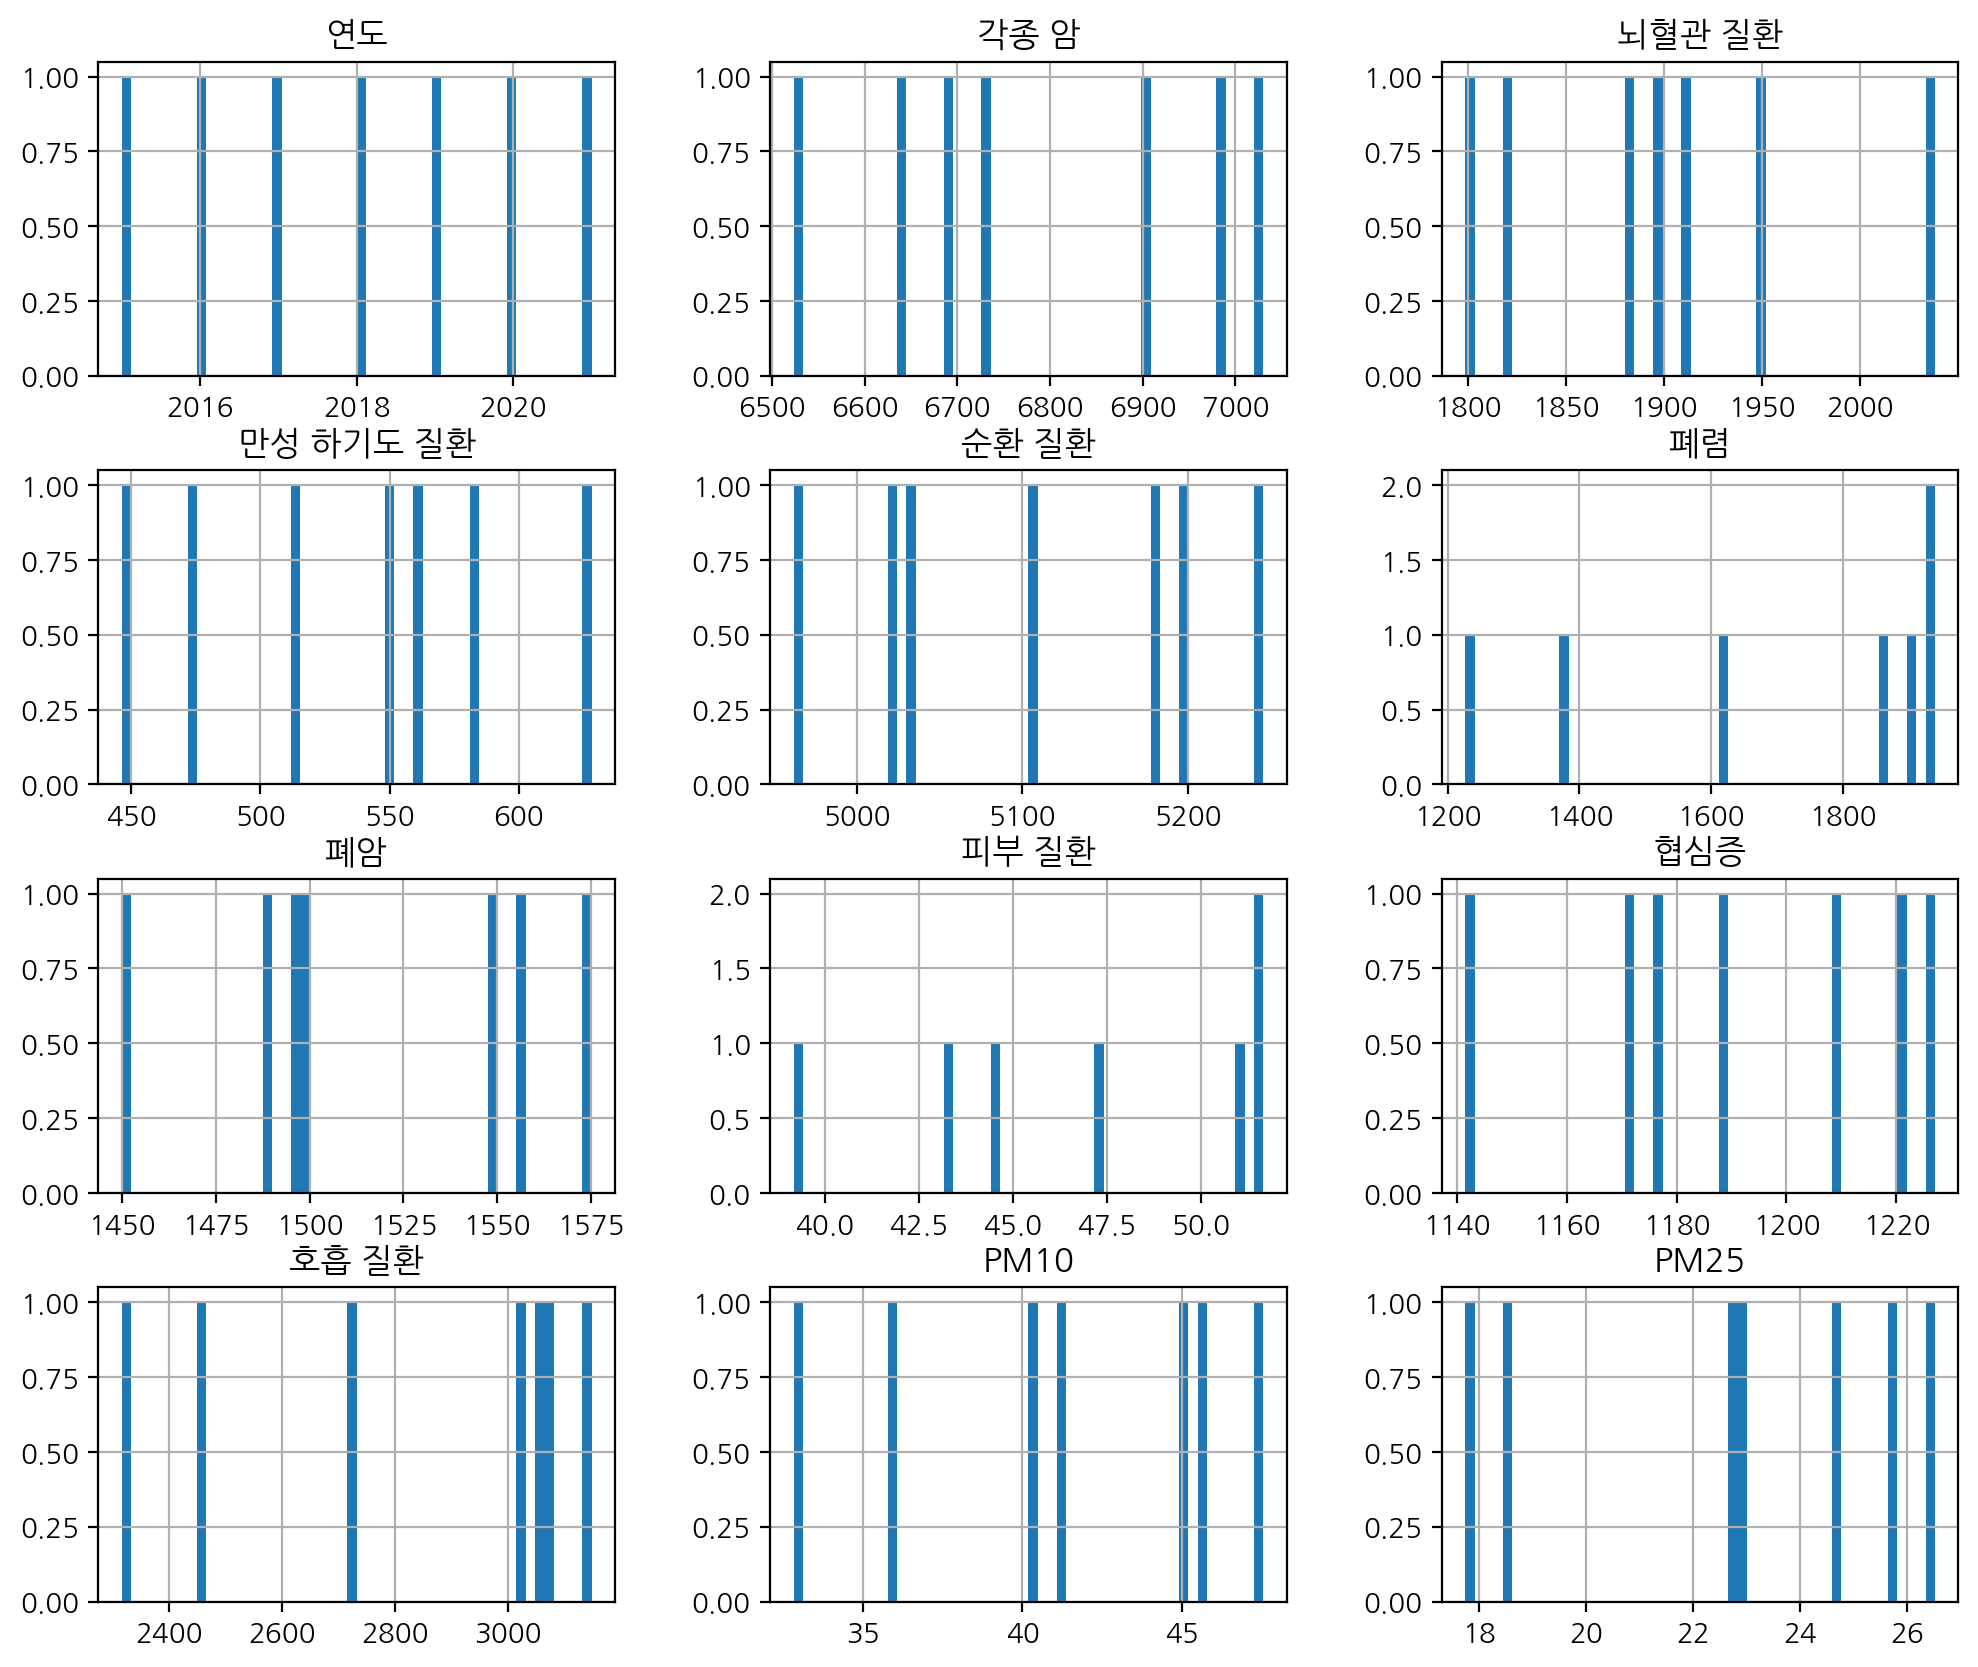

In [56]:
df_gg.hist(bins = 50, figsize = (12,10));

In [74]:
df_gg.to_csv("data/mise_health_disease.csv", encoding="cp949", index=False)
df_gg

,연도,각종 암,뇌혈관 질환,만성 하기도 질환,순환 질환,폐렴,폐암,피부 질환,협심증,호흡 질환,PM10,PM25
0,2015,6523.416667,2037.916667,628.166667,4961.916667,1226.500000,1449.916667,39.166667,1227.000000,2317.166667,47.538998,26.527849
1,2016,6644.083333,1951.250000,582.666667,5032.333333,1373.000000,1496.916667,43.166667,1221.166667,2450.333333,45.716695,25.735213
2,2017,6693.333333,1895.416667,562.500000,5105.500000,1614.833333,1498.333333,51.666667,1188.083333,2720.333333,44.899446,24.686479
3,2018,6728.916667,1911.666667,550.666667,5245.500000,1940.000000,1487.666667,51.000000,1208.333333,3146.916667,41.191954,22.881305
4,2019,6903.666667,1798.833333,514.666667,5021.000000,1930.666667,1547.833333,51.416667,1141.583333,3054.583333,40.303908,22.812924
5,2020,6981.333333,1821.666667,472.333333,5183.000000,1854.750000,1556.083333,47.333333,1171.333333,3030.666667,32.833488,18.526752
6,2021,7030.250000,1883.916667,446.416667,5197.500000,1901.000000,1575.166667,44.416667,1176.250000,3069.250000,35.816950,17.749120


In [58]:
df_c = df_gg.corr()
df_c

,연도,각종 암,뇌혈관 질환,만성 하기도 질환,순환 질환,폐렴,폐암,피부 질환,협심증,호흡 질환,PM10,PM25
연도,1.000000,0.985874,-0.788285,-0.990214,0.673455,0.871430,0.939070,0.380629,-0.756334,0.867690,-0.938676,-0.964328
각종 암,0.985874,1.000000,-0.828195,-0.990772,0.567014,0.821853,0.978256,0.347196,-0.806019,0.808817,-0.937443,-0.945415
뇌혈관 질환,-0.788285,-0.828195,1.000000,0.779668,-0.411765,-0.837172,-0.823159,-0.725401,0.923794,-0.800845,0.742856,0.654327
만성 하기도 질환,-0.990214,-0.990772,0.779668,1.000000,-0.645315,-0.812407,-0.965105,-0.327522,0.736858,-0.805664,0.940531,0.968531
순환 질환,0.673455,0.567014,-0.411765,-0.645315,1.000000,0.735716,0.450699,0.450348,-0.188935,0.776368,-0.675479,-0.708893
폐렴,0.871430,0.821853,-0.837172,-0.812407,0.735716,1.000000,0.736051,0.716064,-0.747765,0.996508,-0.780965,-0.759659
폐암,0.939070,0.978256,-0.823159,-0.965105,0.450699,0.736051,1.000000,0.306016,-0.812625,0.709838,-0.867946,-0.883883
피부 질환,0.380629,0.347196,-0.725401,-0.327522,0.450348,0.716064,0.306016,1.000000,-0.599558,0.689583,-0.272814,-0.199538
협심증,-0.756334,-0.806019,0.923794,0.736858,-0.188935,-0.747765,-0.812625,-0.599558,1.000000,-0.700690,0.652338,0.604031
호흡 질환,0.867690,0.808817,-0.800845,-0.805664,0.776368,0.996508,0.709838,0.689583,-0.700690,1.000000,-0.792532,-0.772505


In [59]:
mask2 = np.triu(np.ones_like(df_c))
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

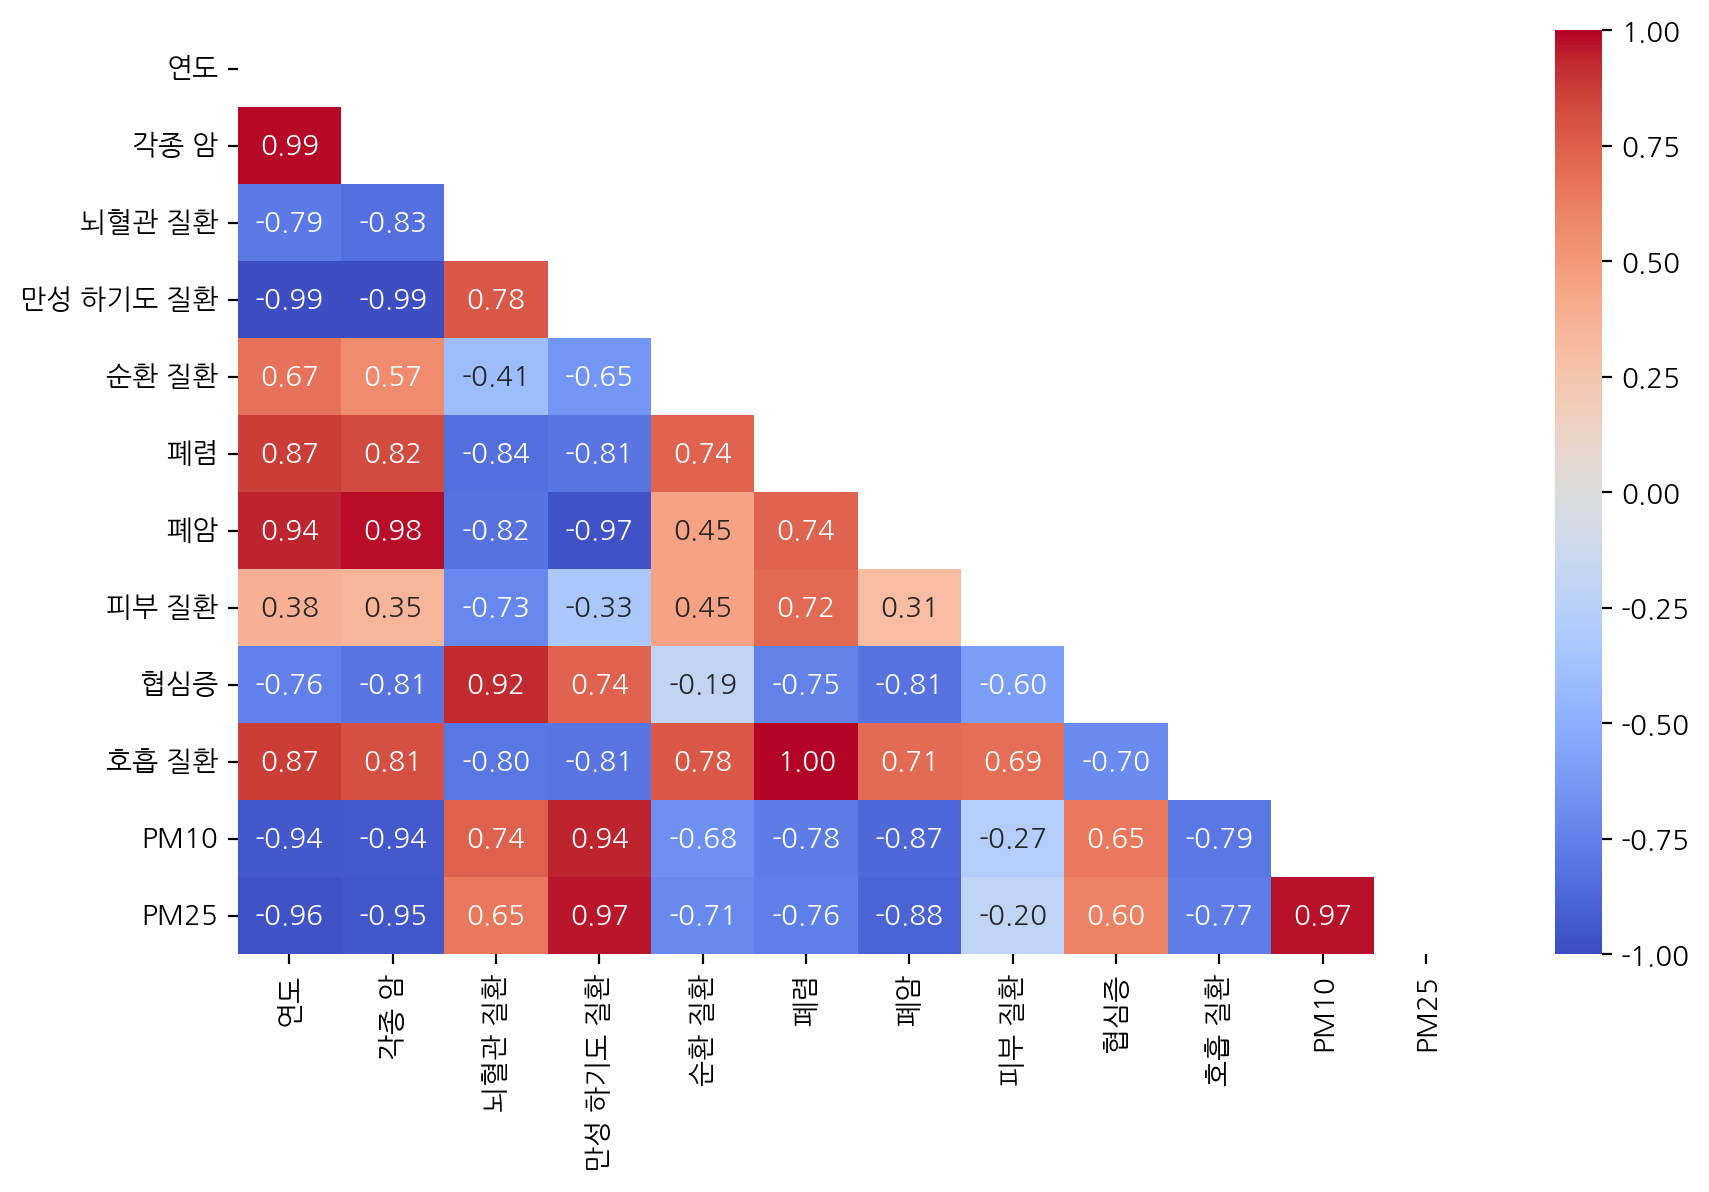

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_c, annot=True, fmt=".2f", cmap = "coolwarm", vmin=-1, vmax=1, mask=mask2);

In [61]:
df_h.groupby(["질환"])["사망자 수"].mean().sort_values(ascending = False)

질환
각종 암         6786.428571
순환 질환        5106.678571
호흡 질환        2827.035714
뇌혈관 질환       1900.095238
폐렴           1691.535714
폐암           1515.988095
협심증          1190.535714
만성 하기도 질환     536.773810
피부 질환          46.880952
Name: 사망자 수, dtype: float64

In [62]:
# 큰 카테고리: 각종 암, 순환 질환, 호흡 질환
# 세부 카테고리: 뇌혈관 질환, 폐렴, 폐암, 협심증, 만성 하기도 질환

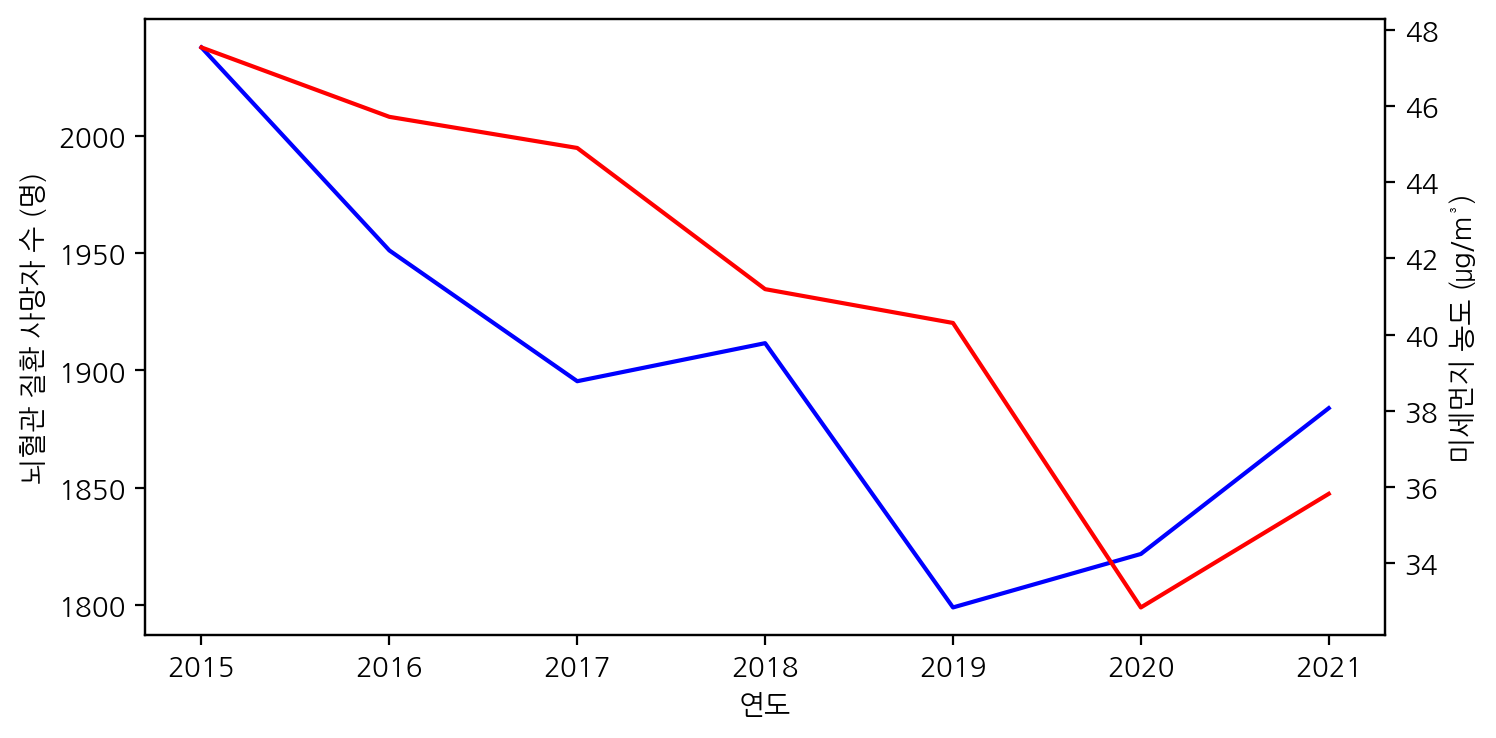

In [63]:
# seaborn으로 이중축 그래프 시각화하기 (뇌혈관 질환 - 미세먼지)

fig = plt.figure(figsize = (8, 4))

ax1 = fig.add_subplot(1,1,1);
ax2 = ax1.twinx();
chart1 = sns.lineplot(data = df_gg, ax = ax1, x = "연도", y = "뇌혈관 질환", color = "blue");
chart2 = sns.lineplot(data = df_gg, ax = ax2, x = "연도", y = "PM10", color = "red");
ax1.set_ylabel("뇌혈관 질환 사망자 수 (명)");
ax2.set_ylabel("미세먼지 농도 (μg/m³)");

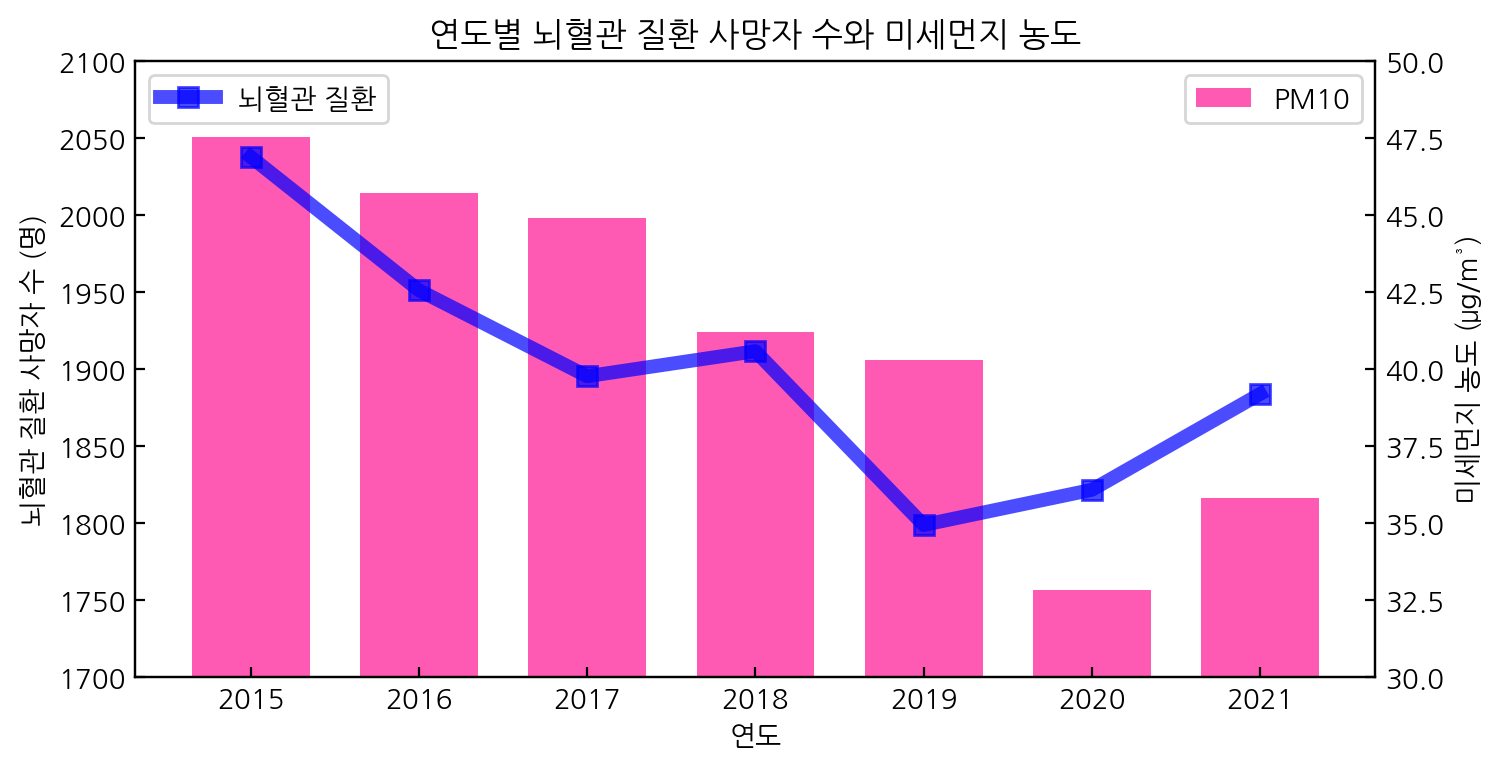

In [64]:
# 연도별 뇌혈관 질환 사망자 수와 미세먼지 농도의 상관관계 시각화 

x = df_gg.연도
y1 = df_gg["뇌혈관 질환"]
y2 = df_gg.PM10

fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.title("연도별 뇌혈관 질환 사망자 수와 미세먼지 농도")

ax1.plot(x, y1, '-s', color='blue', markersize=7, linewidth=5, alpha=0.7, label='뇌혈관 질환')
ax1.set_ylim(1700, 2100)
ax1.set_xlabel('연도')
ax1.set_ylabel('뇌혈관 질환 사망자 수 (명)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='PM10', alpha=0.7, width=0.7)
ax2.set_ylim(30, 50)
ax2.set_ylabel(r'미세먼지 농도 (μg/m³)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

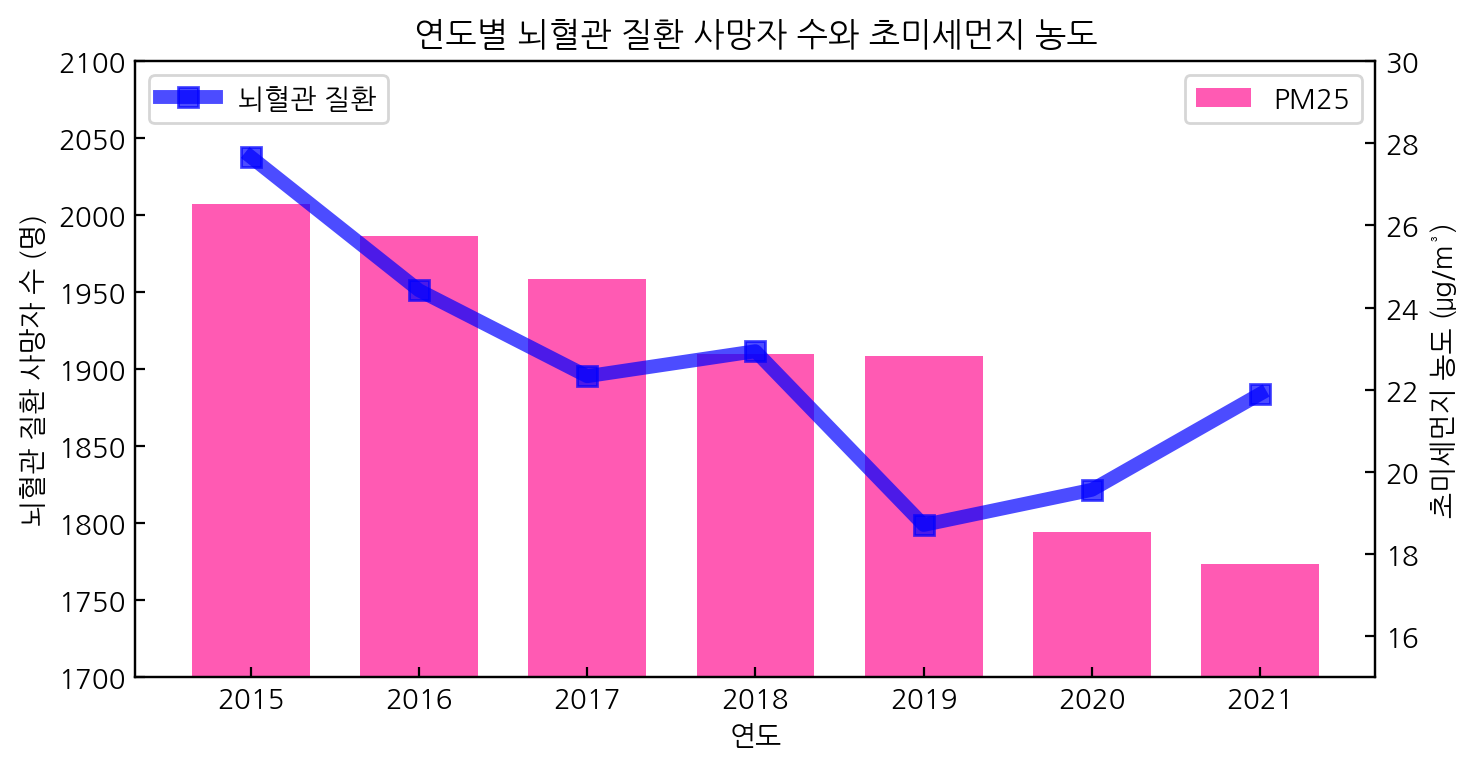

In [65]:
# 연도별 뇌혈관 질환 사망자 수와 초미세먼지 농도의 상관관계 시각화 

x = df_gg.연도
y1 = df_gg["뇌혈관 질환"]
y2 = df_gg.PM25

fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.title("연도별 뇌혈관 질환 사망자 수와 초미세먼지 농도")

ax1.plot(x, y1, '-s', color='blue', markersize=7, linewidth=5, alpha=0.7, label='뇌혈관 질환')
ax1.set_ylim(1700, 2100)
ax1.set_xlabel('연도')
ax1.set_ylabel('뇌혈관 질환 사망자 수 (명)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='PM25', alpha=0.7, width=0.7)
ax2.set_ylim(15, 30)
ax2.set_ylabel(r'초미세먼지 농도 (μg/m³)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

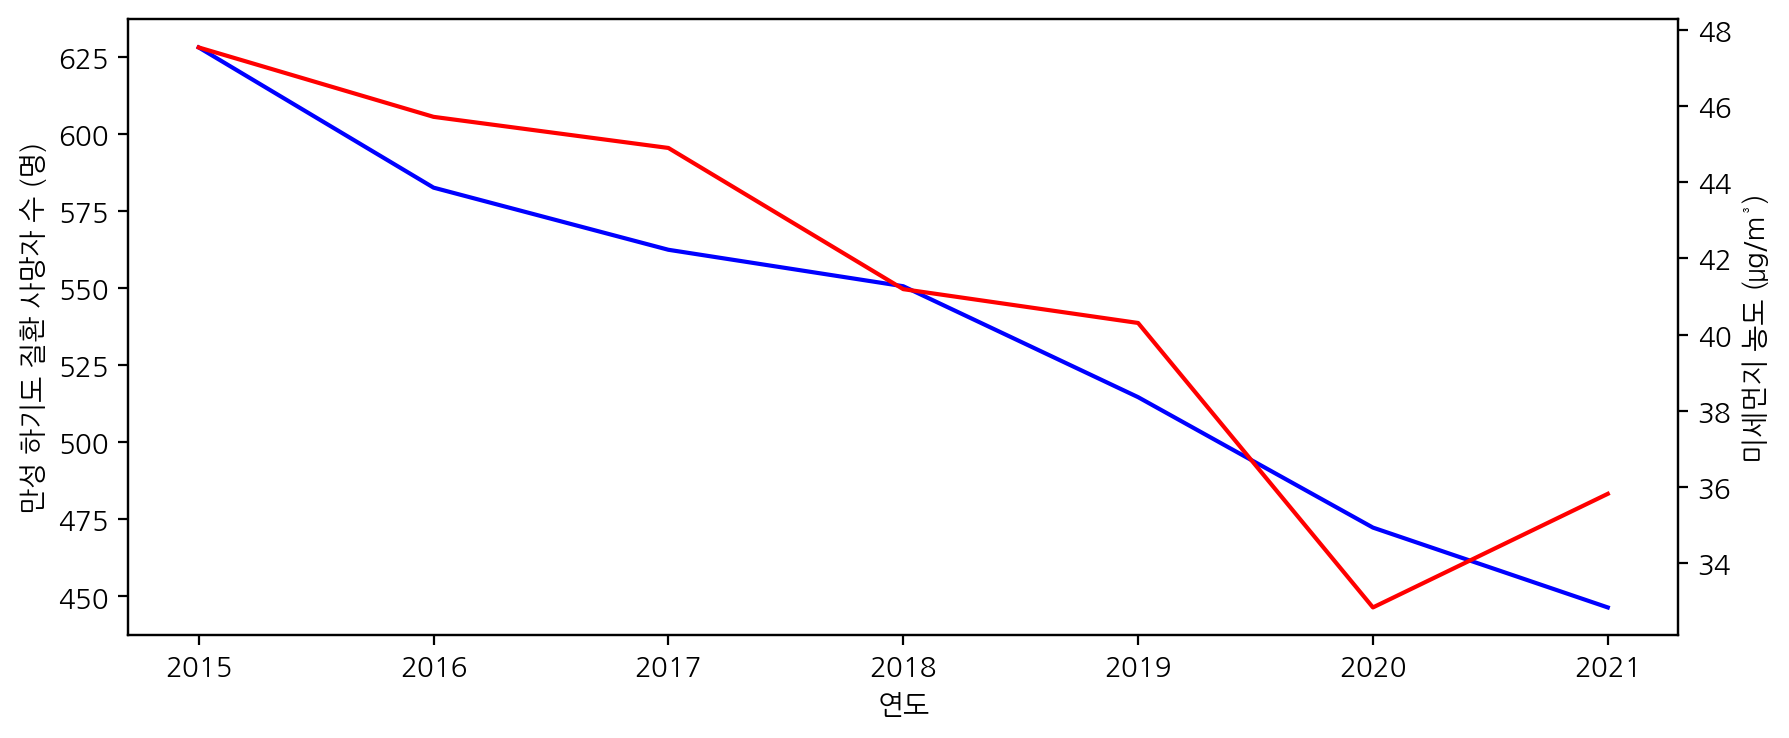

In [66]:
# seaborn으로 이중축 그래프 시각화하기 (만성 하기도 질환 - 미세먼지)

fig = plt.figure(figsize = (10, 4))

ax1 = fig.add_subplot(1,1,1);
ax2 = ax1.twinx();
chart1 = sns.lineplot(data = df_gg, ax = ax1, x = "연도", y = "만성 하기도 질환", color = "blue");
chart2 = sns.lineplot(data = df_gg, ax = ax2, x = "연도", y = "PM10", color = "red");
ax1.set_ylabel("만성 하기도 질환 사망자 수 (명)");
ax2.set_ylabel("미세먼지 농도 (μg/m³)");

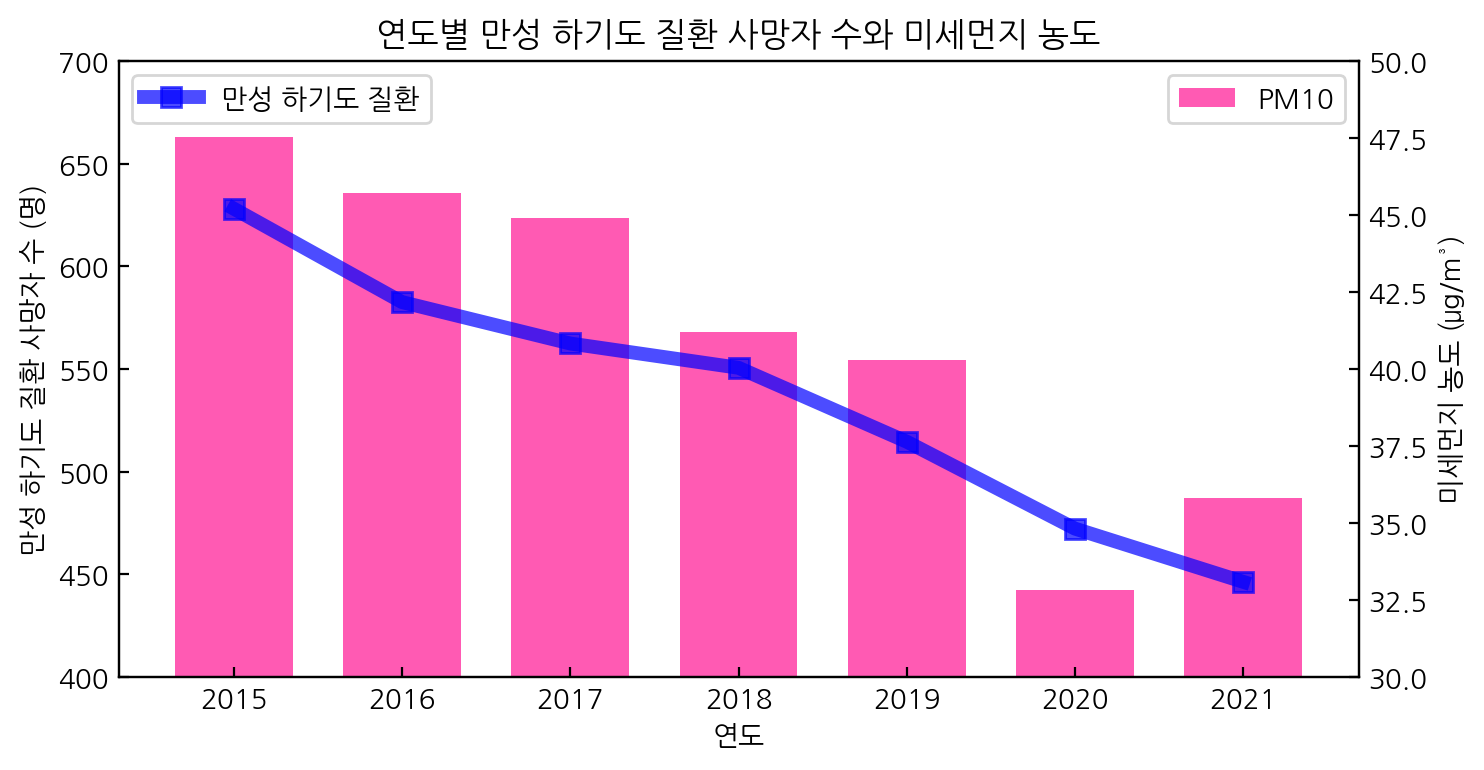

In [67]:
# 연도별 만성 하기도 질환 사망자 수와 미세먼지 농도의 상관관계 시각화 

x = df_gg.연도
y1 = df_gg["만성 하기도 질환"]
y2 = df_gg.PM10

fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.title("연도별 만성 하기도 질환 사망자 수와 미세먼지 농도")

ax1.plot(x, y1, '-s', color='blue', markersize=7, linewidth=5, alpha=0.7, label='만성 하기도 질환')
ax1.set_ylim(400, 700)
ax1.set_xlabel('연도')
ax1.set_ylabel('만성 하기도 질환 사망자 수 (명)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='PM10', alpha=0.7, width=0.7)
ax2.set_ylim(30, 50)
ax2.set_ylabel(r'미세먼지 농도 (μg/m³)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

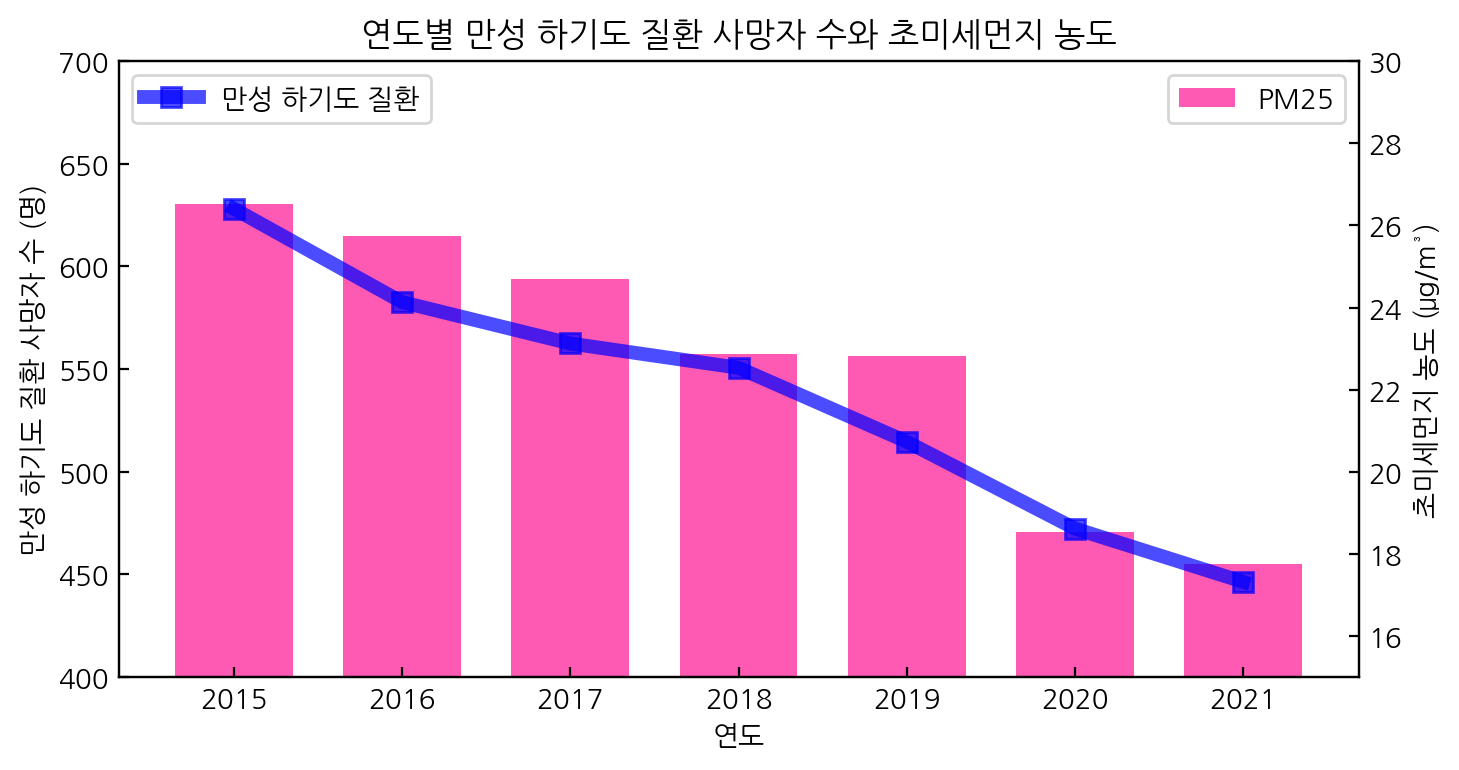

In [68]:
# 연도별 뇌혈관 질환 사망자 수와 초미세먼지 농도의 상관관계 시각화 

x = df_gg.연도
y1 = df_gg["만성 하기도 질환"]
y2 = df_gg.PM25

fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.title("연도별 만성 하기도 질환 사망자 수와 초미세먼지 농도")

ax1.plot(x, y1, '-s', color='blue', markersize=7, linewidth=5, alpha=0.7, label='만성 하기도 질환')
ax1.set_ylim(400, 700)
ax1.set_xlabel('연도')
ax1.set_ylabel('만성 하기도 질환 사망자 수 (명)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='PM25', alpha=0.7, width=0.7)
ax2.set_ylim(15, 30)
ax2.set_ylabel(r'초미세먼지 농도 (μg/m³)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

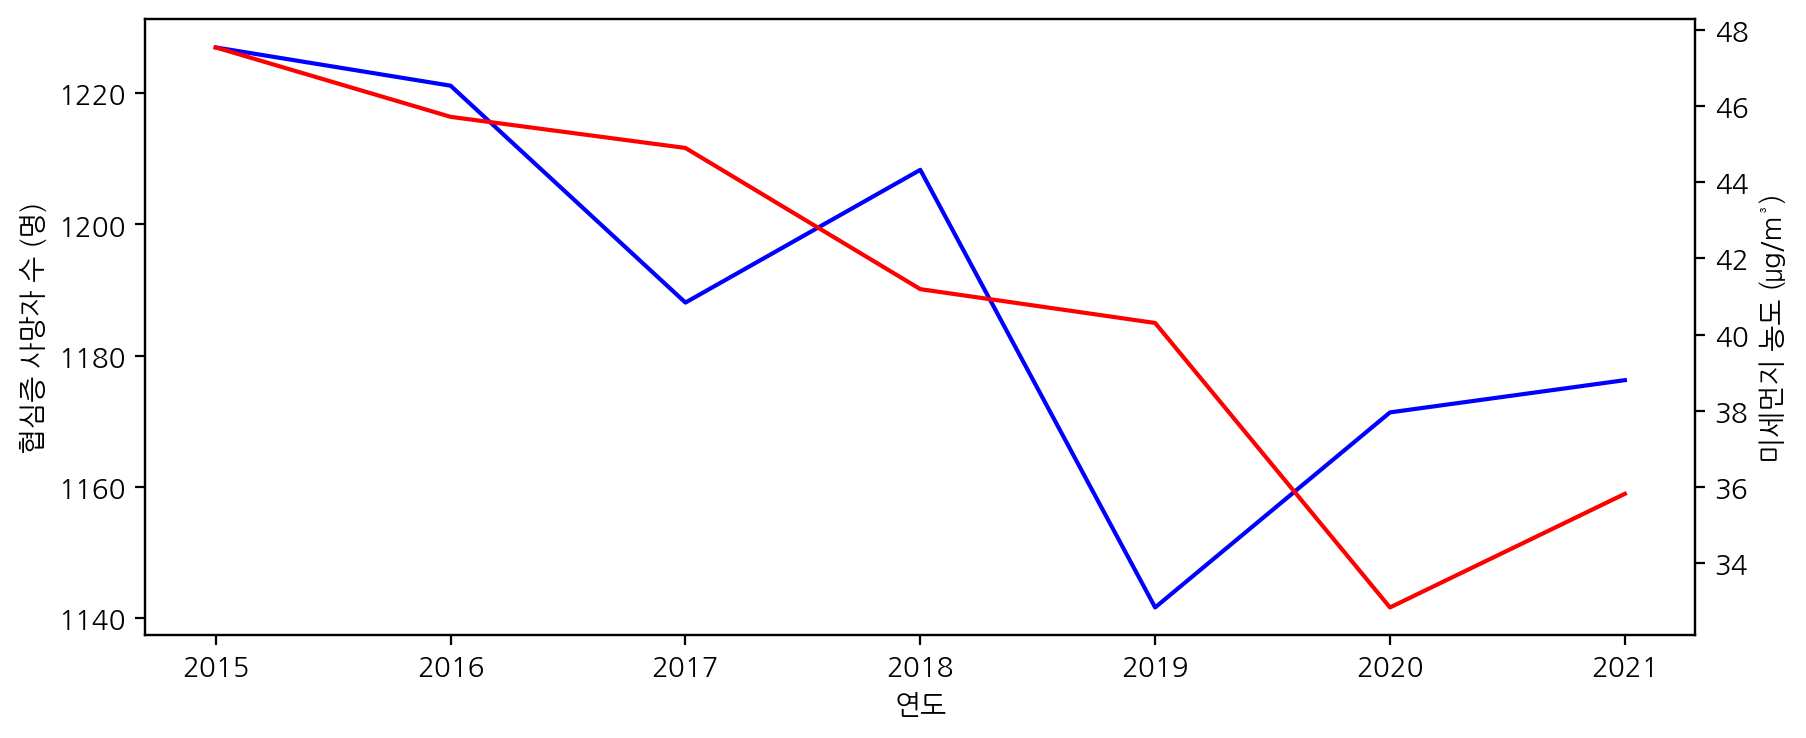

In [69]:
# seaborn으로 이중축 그래프 시각화하기 (협심증 - 미세먼지)

fig = plt.figure(figsize = (10, 4))

ax1 = fig.add_subplot(1,1,1);
ax2 = ax1.twinx();
chart1 = sns.lineplot(data = df_gg, ax = ax1, x = "연도", y = "협심증", color = "blue");
chart2 = sns.lineplot(data = df_gg, ax = ax2, x = "연도", y = "PM10", color = "red");
ax1.set_ylabel("협심증 사망자 수 (명)");
ax2.set_ylabel("미세먼지 농도 (μg/m³)");

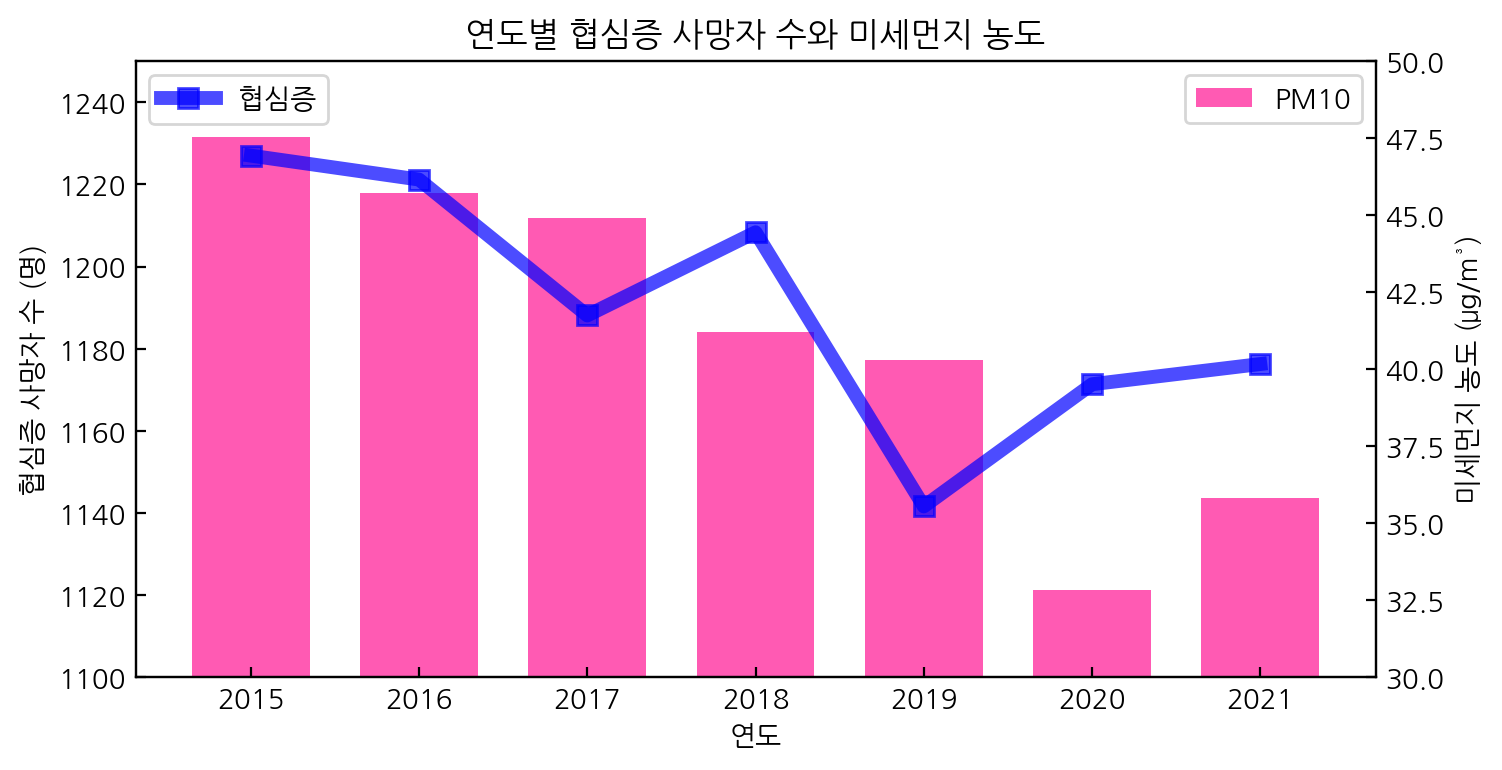

In [70]:
# 연도별 협심증 사망자 수와 미세먼지 농도의 상관관계 시각화 

x = df_gg.연도
y1 = df_gg["협심증"]
y2 = df_gg.PM10

fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.title("연도별 협심증 사망자 수와 미세먼지 농도")

ax1.plot(x, y1, '-s', color='blue', markersize=7, linewidth=5, alpha=0.7, label='협심증')
ax1.set_ylim(1100, 1250)
ax1.set_xlabel('연도')
ax1.set_ylabel('협심증 사망자 수 (명)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='PM10', alpha=0.7, width=0.7)
ax2.set_ylim(30, 50)
ax2.set_ylabel(r'미세먼지 농도 (μg/m³)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

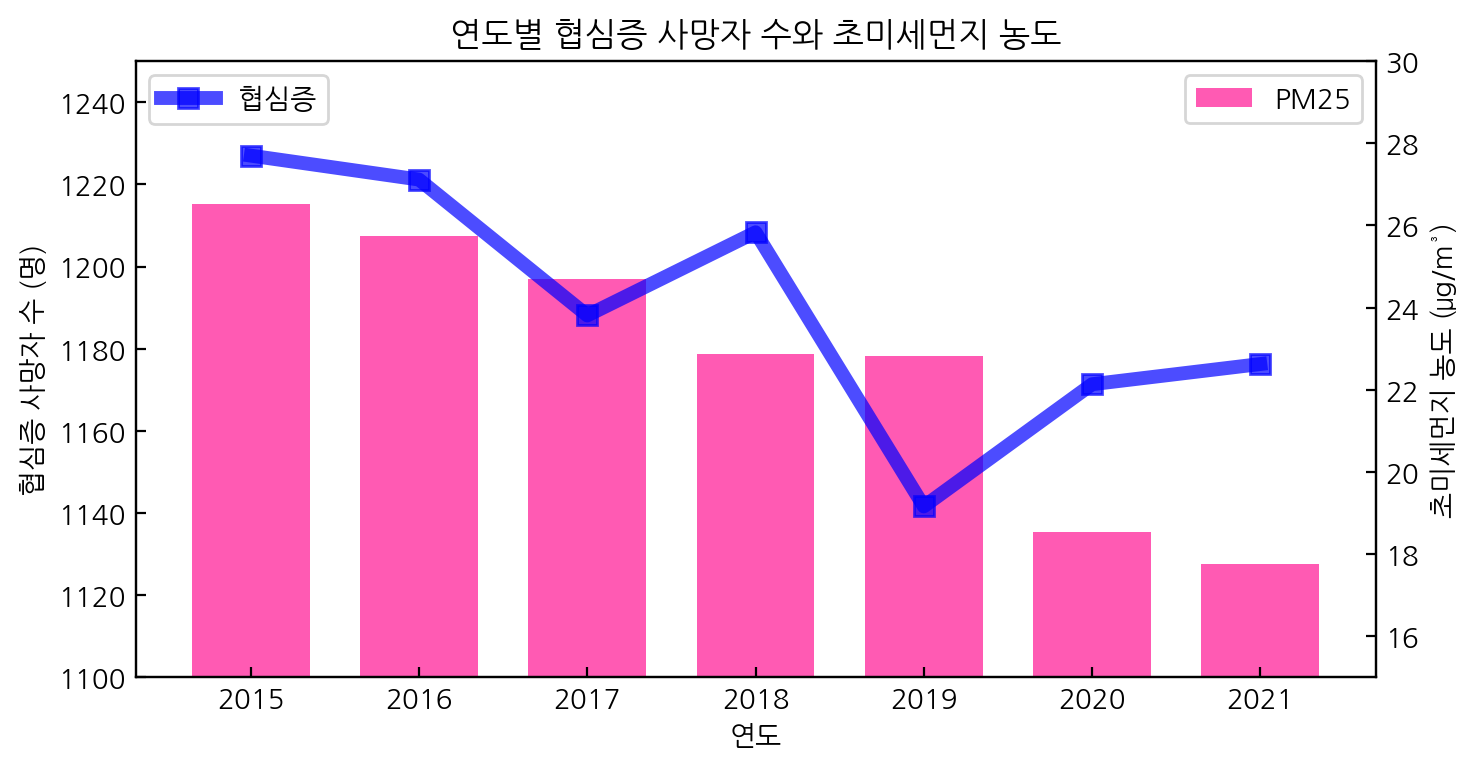

In [71]:
# 연도별 협심증 사망자 수와 초미세먼지 농도의 상관관계 시각화 

x = df_gg.연도
y1 = df_gg["협심증"]
y2 = df_gg.PM25

fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 4)
plt.title("연도별 협심증 사망자 수와 초미세먼지 농도")

ax1.plot(x, y1, '-s', color='blue', markersize=7, linewidth=5, alpha=0.7, label='협심증')
ax1.set_ylim(1100, 1250)
ax1.set_xlabel('연도')
ax1.set_ylabel('협심증 사망자 수 (명)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='PM25', alpha=0.7, width=0.7)
ax2.set_ylim(15, 30)
ax2.set_ylabel(r'초미세먼지 농도 (μg/m³)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [72]:
data2 = df_all.drop(columns=['아토피피부염','알레르기비염'])
data2 = data2.melt(id_vars=['연도','천식'],var_name='종류',value_name='농도')
data2

,연도,천식,종류,농도
0,2015,9.3,PM10,47.538998
1,2016,9.4,PM10,45.716695
2,2017,9.4,PM10,44.899446
3,2018,8.9,PM10,41.191954
4,2019,7.4,PM10,40.303908
5,2020,6.7,PM10,32.833488
6,2021,6.1,PM10,35.816950
7,2015,9.3,PM25,26.527849
8,2016,9.4,PM25,25.735213
9,2017,9.4,PM25,24.686479
